# Spike Challenge

*Objective:* Predict the price of milk in Chile given macroeconomic and weather variables. 

By Daniela A. Gómez Cravioto


## Libraries

In this section we import the libraries that will be used for the data analysis.

In [182]:
# pandas data frames
import pandas as pd
#datetime format
import datetime
#multidimensional arrays
import numpy as np
np.random.seed(123)
#visualizations
import seaborn as sns 
import matplotlib as mpl
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.dpi'] = 100
params = {
        'legend.fontsize': 18,
        'figure.figsize': (12, 10),
        'axes.labelsize': 18,
        'axes.titlesize': 20,
        'xtick.labelsize': 15,
        'ytick.labelsize': 15
}
plt.rcParams.update(params)
plt.style.use('fivethirtyeight')
bit = dict(markerfacecolor = 'b', marker = 'p')
import matplotlib.dates as mdates
#statistics 
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import winsorize
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import sklearn.metrics as metrics

# To construct the LSTM nerural network with keras and tensorflow backend
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import TimeDistributed
import tensorflow

## Data

The datasets are now imported.

In [2]:
missing_values = ['','a']
varClim = pd.read_csv('Data/precipitaciones.csv') #precipitaciones por region
varMacr = pd.read_csv('Data/banco_central.csv', na_values=missing_values) #variables macroeconomicas
precios  = pd.read_csv('Data/precio_leche.csv') #variable dependiente

## Cleansing and Exploratory Data Analysis

We will explore the data to identify any irregularity, check the distribution of the target variable, remove duplicate variables and eliminate variables that have more than 50% of missing data.

In [3]:
varClim.head()

date  Coquimbo  Valparaiso  Metropolitana_de_Santiago  \
0  1989-02-01  0.719033    0.117045                   0.028272   
1  1998-10-01  0.065216    0.000000                   0.011493   
2  2001-02-01  2.030026    0.047987                   0.002634   
3  2008-11-01  0.622784    0.000000                   0.015872   
4  2009-04-01  0.008065    0.000000                   0.009396   

   Libertador_Gral__Bernardo_O_Higgins      Maule     Biobio  La_Araucania  \
0                                  0.0   0.724667   9.172945     22.595834   
1                                  0.0   0.008968   2.089674     14.702087   
2                                  0.0   0.032163  10.768351     29.465057   
3                                  0.0   1.734168  25.083557     64.901645   
4                                  0.0  12.080715  56.233424     96.364235   

     Los_Rios  
0   52.268010  
1   45.142041  
2   65.571098  
3  113.093488  
4  155.622235

In [4]:
varMacr.head()

Periodo Imacec_empalmado Imacec_produccion_de_bienes  \
0  2013-03-01 00:00:00 UTC      102.796.218                  10.546.824   
1  2013-04-01 00:00:00 UTC      101.664.842                 999.272.757   
2  2013-05-01 00:00:00 UTC      101.642.954                 993.959.922   
3  2013-06-01 00:00:00 UTC      998.310.201                 968.367.884   
4  2013-07-01 00:00:00 UTC      964.696.194                 961.051.418   

  Imacec_minero Imacec_industria Imacec_resto_de_bienes Imacec_comercio  \
0   978.554.365      102.297.537            114.994.919     110.729.395   
1   927.333.293      104.485.589            102.199.311     106.098.291   
2    96.133.164      105.445.361            968.789.055     100.462.117   
3   102.400.933      999.212.106             89.190.493     939.504.414   
4   980.029.022      100.882.112            901.785.886      92.776.599   

  Imacec_servicios Imacec_a_costo_de_factores Imacec_no_minero  ...  \
0      100.064.328                103.163.651      103.405.852  ...   
1      102.600.107                101.937.319      102.766.884  ...   
2      104.083.216                101.953.299      102.322.796  ...   
3      103.857.161                100.222.381      995.139.235  ...   
4      969.309.272                962.069.134      962.804.305  ...   

  Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100  \
0                                        865.903.468      
1                                        867.806.065      
2                                        878.030.947      
3                                        913.180.348      
4                                        909.263.447      

  Indice_de_produccion_industrial Indice_de_produccion_industrial__mineria  \
0                     102.761.705                               98.915.705   
1                     968.087.179                              914.276.663   
2                     978.471.874                              966.913.278   
3                     966.647.135                              981.820.974   
4                     100.100.749                              990.198.382   

  Indice_de_produccion_industrial_electricidad__gas_y_agua  \
0                                                NaN         
1                                                NaN         
2                                                NaN         
3                                                NaN         
4                                                NaN         

  Indice_de_produccion_industrial__manufacturera  \
0                                    108.387.837   
1                                    104.545.429   
2                                     99.468.801   
3                                     94.969.678   
4                                    102.128.977   

  Generacion_de_energia_electrica_CDEC_GWh  \
0                              580.480.672   
1                              544.815.032   
2                               56.891.916   
3                               56.594.867   
4                              586.329.899   

  Indice_de_ventas_comercio_real_IVCM  \
0                                 NaN   
1                                 NaN   
2                                 NaN   
3                                 NaN   
4                                 NaN   

  Indice_de_ventas_comercio_real_no_durables_IVCM  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   

  Indice_de_ventas_comercio_real_durables_IVCM Ventas_autos_nuevos  
0                                          NaN             28577.0  
1                                          NaN             32206.0  
2                                          NaN             31589.0  
3                                          NaN             28

In [5]:
precios.head()

Anio  Mes  Precio_leche
0  1979  Ene          3.85
1  1979  Feb          4.58
2  1979  Mar          5.18
3  1979  Abr          6.06
4  1979  May          7.25

In [6]:
varMacr.describe()

Precio_de_la_onza_troy_de_oro_dolaresoz  \
count                               613.000000   
mean                                578.706574   
std                                 468.018646   
min                                  34.940000   
25%                                 292.540000   
50%                                 385.040000   
75%                                 828.800000   
max                                1969.780000   

       Precio_de_la_onza_troy_de_plata_dolaresoz  \
count                                 613.000000   
mean                                   54.202123   
std                                    89.493857   
min                                     1.320000   
25%                                     4.760000   
50%                                     6.080000   
75%                                    35.080000   
max                                   431.028000   

       Precio_del_diesel_centavos_de_dolargalon  \
count                                172.000000   
mean                                 215.337558   
std                                   68.625224   
min                                   79.490000   
25%                                  162.447500   
50%                                  200.340000   
75%                                  286.392500   
max                                  384.380000   

       Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas  \
count                                         253.000000                      
mean                                            5.055426                      
std                                             8.580500                      
min                                             1.612800                      
25%                                             2.863800                      
50%                                             3.885100                      
75%                                             5.930000                      
max                                           136.338000                      

       Precio_del_petroleo_Brent_dolaresbarril  \
count                               253.000000   
mean                                 63.673202   
std                                  29.704824   
min                                  18.600000   
25%                                  39.930000   
50%                                  59.370000   
75%                                  79.270000   
max                                 133.900000   

       Precio_del_petroleo_WTI_dolaresbarril  \
count                             453.000000   
mean                               43.066137   
std                                28.014437   
min                                11.300000   
25%                                20.100000   
50%                                30.390000   
75%                                59.800000   
max                               133.930000   

       Precio_del_propano_centavos_de_dolargalon_DTN  Ventas_autos_nuevos  
count                                     157.000000           145.000000  
mean                                       88.528822         26694.082759  
std                                        36.772454          7170.231956  
min                                        29.233000          4658.000000  
25%                                        54.888000         23701.000000  
50%                                        88.043000         27912.000000  
75%                                       110.738000         31800.000000  
max                                       187.875000         39263.000000

As can be observed from the previous table, not all features appear in the description. Hence, it will need to check the data type and change it accordingly

In [7]:
varClim.describe()

Coquimbo  Valparaiso  Metropolitana_de_Santiago  \
count  496.000000  496.000000                 496.000000   
mean    16.154691   32.450980                  49.666682   
std     32.629286   55.434330                  74.361099   
min      0.000000    0.000000                   0.000000   
25%      0.821521    1.538162                   5.297546   
50%      4.071036    9.037825                  19.087592   
75%     16.137600   38.409213                  63.408364   
max    347.133889  441.048604                 524.592667   

       Libertador_Gral__Bernardo_O_Higgins       Maule      Biobio  \
count                           496.000000  496.000000  496.000000   
mean                             72.249805   98.662773  128.113406   
std                             101.426112  122.766771  130.056094   
min                               0.000000    0.000000    0.001170   
25%                               5.343992   11.897363   29.356684   
50%                              25.995969   45.649888   79.558557   
75%                             101.875093  142.230716  184.751307   
max                             645.515752  759.177712  702.434707   

       La_Araucania    Los_Rios  
count    496.000000  496.000000  
mean     151.486456  199.451789  
std      126.628503  140.073615  
min        0.005331    0.748127  
25%       52.930343   89.805643  
50%      110.570990  159.467940  
75%      208.316243  274.594590  
max      661.211203  717.735673

In [8]:
precios.describe()

Anio  Precio_leche
count   506.000000    506.000000
mean   1999.584980    114.444980
std      12.183973     78.999882
min    1979.000000      3.850000
25%    1989.000000     48.162500
50%    2000.000000    102.250000
75%    2010.000000    189.175000
max    2021.000000    318.880000

The output variable (Precio_leche) has a mean of 114.4450 and a standard deviation of 78.9999, indicating high variation.  Additionally, the maximum price of 318.88, is 2.5878 times more than the standard deviation, which indicates a positive skeweness. The distribution can be better explored with boxplots and distributions plots. 

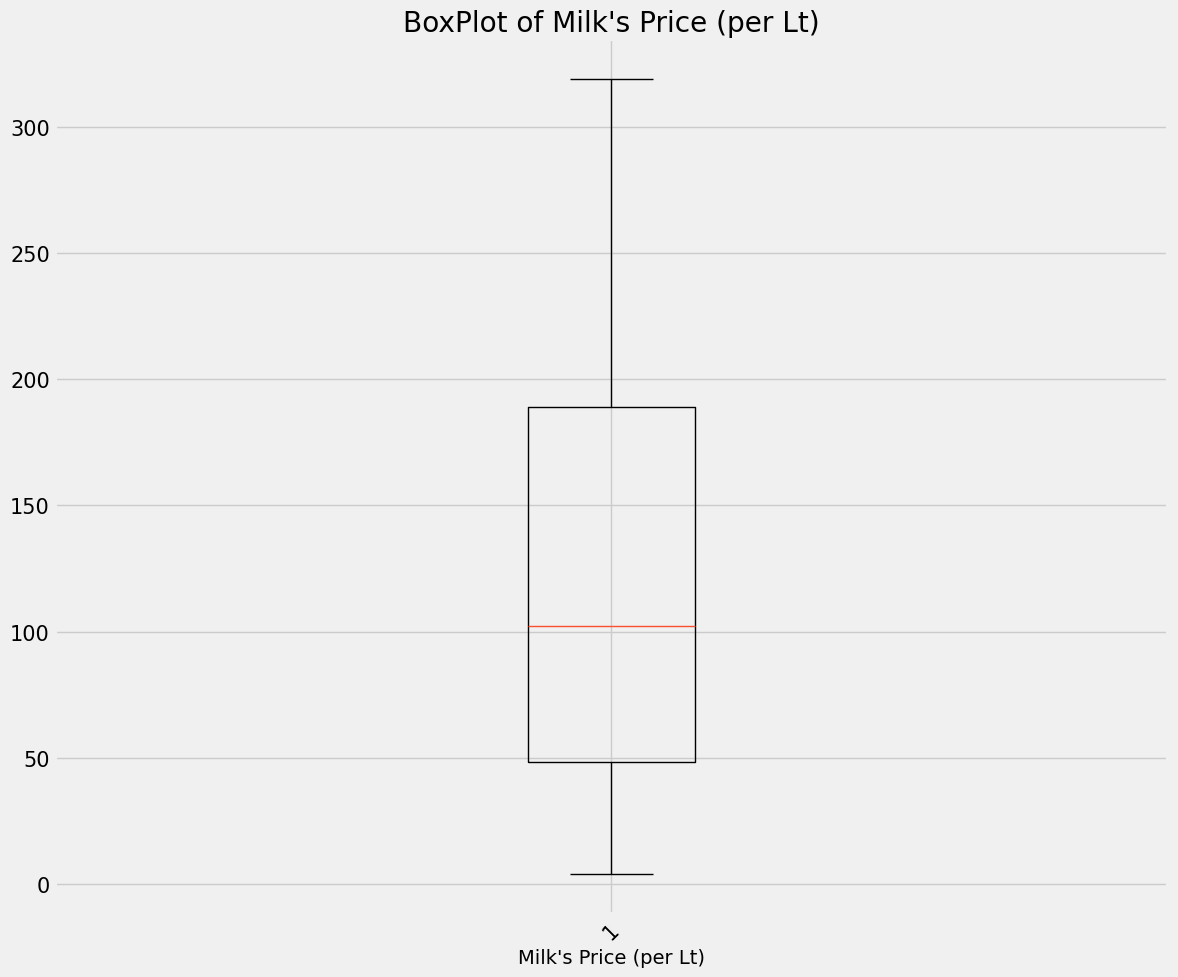

In [9]:
fig, ax = plt.subplots()
ax.boxplot(precios['Precio_leche'],  flierprops = bit)
ax.set_xlabel("Milk's Price (per Lt)", fontsize=14)
ax.set_title("BoxPlot of Milk's Price (per Lt)")
ax.tick_params(axis='x', labelrotation=45)
fig.tight_layout()

The boxplot shows a departure from symmetry  and a higher amount of data in the upper fourth. The data stretches out more to the higher end . The box itself is wide, indicating a fair amount of variability. Finally, the upper whisker is long showing higher extreme values in the higher end. 

/Users/dannygc/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Milk's Price (per Lt) Distribution")

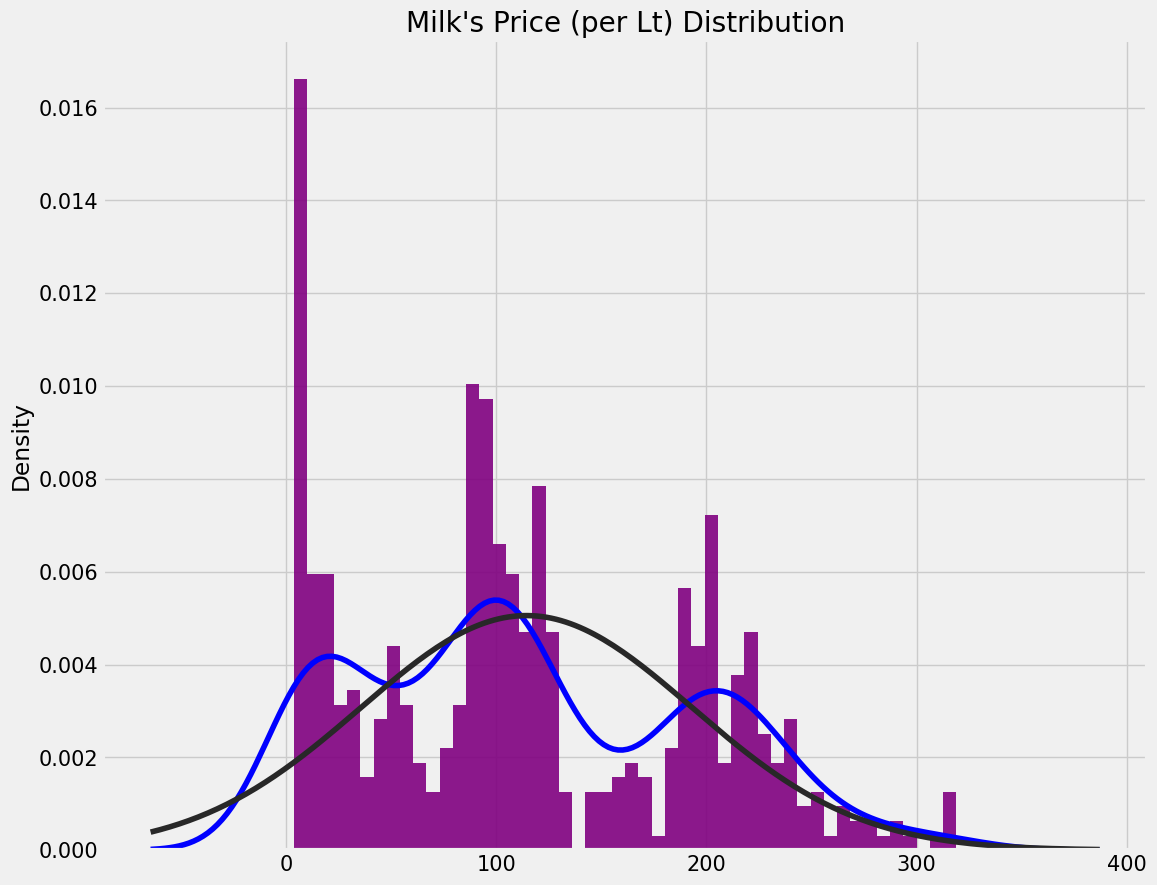

In [10]:

sns.distplot(x = precios['Precio_leche'], fit = norm, kde = True, bins = 50, color = 'b', hist_kws = {'color':'purple', 'alpha':0.9}).set_title("Milk's Price (per Lt) Distribution")

The density plot gives higher insight into the distribution of the target variable, milk prices. At first sight, we can observe a multimodal distribution, showing three peaks of data, one close to 20, another around 100, and the third one around 200. This indicates there are three different groups in the price data. We can also identify that using parametric models would require a transformation of this variable as the data does not seem to have a normal distribution. 

### Dates Standarization

In [11]:
varClim.dtypes

date                                    object
Coquimbo                               float64
Valparaiso                             float64
Metropolitana_de_Santiago              float64
Libertador_Gral__Bernardo_O_Higgins    float64
Maule                                  float64
Biobio                                 float64
La_Araucania                           float64
Los_Rios                               float64
dtype: object

In [12]:
varMacr.dtypes

Periodo                                             object
Imacec_empalmado                                    object
Imacec_produccion_de_bienes                         object
Imacec_minero                                       object
Imacec_industria                                    object
                                                    ...   
Generacion_de_energia_electrica_CDEC_GWh            object
Indice_de_ventas_comercio_real_IVCM                 object
Indice_de_ventas_comercio_real_no_durables_IVCM     object
Indice_de_ventas_comercio_real_durables_IVCM        object
Ventas_autos_nuevos                                float64
Length: 85, dtype: object

It was identified that the data had inconsistencies, for instance it had an 'a' character in certain columns which were missing a value, we took this data as a missing value. There were also some columns that contained two decimal pointsWe decided to remove the second decimal point as by researching the data in Chile's central bank, it was found that the provided data had an additional decimal point (a potential typo). It was noticed that the Imacec values from the provided data and Chile's central bank's data slightly differ in a few decimals, however, the provided data was considered as priority for the analysis.We identified that the data had inconsistencies; for instance, it had an 'a' character in specific columns which were only composed of continuous values; hence we indicated pandas to take this character as a missing value. Some columns contained two decimal points. By researching the data in Chile's central bank, it was found that the provided data had an additional decimal point (a potential typo); thus, we removed the second decimal point. In addition, we noticed that the Imacec values from the provided data and Chile's central bank's data slightly differ in a few decimals; however, the provided data was given priority for the analysis.

In [13]:
col_change = varMacr.loc[:,((varMacr.dtypes == 'O')&(varMacr.columns.values != 'Periodo'))].columns.values

def eliminate(x):
    if pd.isnull(x) == True:
        return np.nan
    elif len(x.split('.')) < 3:
        if len(x.split('.')) > 1:
            return float(x.split('.')[0]+'.'+x.split('.')[1])
        else:
            return float(x)
    else:
        return float(x.split('.')[0]+'.'+x.split('.')[1]+x.split('.')[2])

for col in col_change:
    varMacr[col] = varMacr.apply(lambda row: eliminate(row[col]), axis=1)

In [14]:
precios.dtypes

Anio              int64
Mes              object
Precio_leche    float64
dtype: object

In [15]:
varClim['date'] = varClim['date'].apply(pd.to_datetime)
varClim['date']

0     1989-02-01
1     1998-10-01
2     2001-02-01
3     2008-11-01
4     2009-04-01
         ...    
491   1988-10-01
492   2019-08-01
493   2015-06-01
494   2016-09-01
495   1982-04-01
Name: date, Length: 496, dtype: datetime64[ns]

In [16]:
varClim.rename(columns = {'date': 'Date'},inplace = True)

In [17]:
#varMacr['Periodo']  = pd.to_datetime(varMacr['Periodo'], errors = 'raise', dayfirst=False, yearfirst=True)

It seems like the months are out of bounds. There is a month that has a 13 value. Since this row has not much information, we will drop it.

In [18]:
varMacr.loc[varMacr['Periodo'] == '2020-13-01 00:00:00 UTC']


Periodo  Imacec_empalmado  Imacec_produccion_de_bienes  \
89  2020-13-01 00:00:00 UTC               NaN                          NaN   

    Imacec_minero  Imacec_industria  Imacec_resto_de_bienes  Imacec_comercio  \
89            NaN               NaN                     NaN       803.222345   

    Imacec_servicios  Imacec_a_costo_de_factores  Imacec_no_minero  ...  \
89               NaN                         NaN               NaN  ...   

    Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100  \
89                                                NaN       

    Indice_de_produccion_industrial  Indice_de_produccion_industrial__mineria  \
89                              NaN                                       NaN   

    Indice_de_produccion_industrial_electricidad__gas_y_agua  \
89                                                NaN          

    Indice_de_produccion_industrial__manufacturera  \
89                                             NaN   

    Generacion_de_energia_electrica_CDEC_GWh  \
89                                       NaN   

    Indice_de_ventas_comercio_real_IVCM  \
89                                  NaN   

    Indice_de_ventas_comercio_real_no_durables_IVCM  \
89                                              NaN   

    Indice_de_ventas_comercio_real_durables_IVCM  Ventas_autos_nuevos  
89                                    893.234345                  NaN  

[1 rows x 85 columns]

In [19]:
varMacr = varMacr[varMacr['Periodo'] != '2020-13-01 00:00:00 UTC']

In [20]:
varMacr['Periodo']  = pd.to_datetime(varMacr['Periodo'], errors = 'raise', dayfirst=False, yearfirst=True,utc = False)
varMacr['Periodo'] = varMacr['Periodo'].dt.tz_localize(None)

In [21]:
varMacr.rename(columns = {'Periodo': 'Date'},inplace = True)

In [22]:
precios.Anio = precios.Anio.astype('str')

In [23]:
precios.Mes= precios.Mes.map({'Ene':'01','Feb':'02','Mar':'03','Abr':'04','May':'05','Jun':'06','Jul':'07','Ago':'08','Sep':'09','Oct':'10','Nov':'11','Dic':'12'})

In [24]:
precios['Date'] = precios['Anio'] +  '-' + precios['Mes']  + '-' + '01'

In [25]:
precios['Date']

0      1979-01-01
1      1979-02-01
2      1979-03-01
3      1979-04-01
4      1979-05-01
          ...    
501    2020-10-01
502    2020-11-01
503    2020-12-01
504    2021-01-01
505    2021-02-01
Name: Date, Length: 506, dtype: object

In [26]:
precios.drop(['Anio','Mes'], axis = 1,inplace = True)

### Duplicated Rows

In [27]:
precios[precios.duplicated()]

Empty DataFrame
Columns: [Precio_leche, Date]
Index: []

In [28]:
varClim[varClim.duplicated()]

Empty DataFrame
Columns: [Date, Coquimbo, Valparaiso, Metropolitana_de_Santiago, Libertador_Gral__Bernardo_O_Higgins, Maule, Biobio, La_Araucania, Los_Rios]
Index: []

In [29]:
varMacr.loc[varMacr.duplicated()]

Date  Imacec_empalmado  Imacec_produccion_de_bienes  Imacec_minero  \
66 2018-08-01        109.690834                   994.693267     101.027633   
79 2019-08-01        113.886371                   103.237519     106.828407   

    Imacec_industria  Imacec_resto_de_bienes  Imacec_comercio  \
66          1.051861              931.900957       106.248833   
79        105.153122              984.395274       106.901816   

    Imacec_servicios  Imacec_a_costo_de_factores  Imacec_no_minero  ...  \
66        117.404143                  109.458386        110.578221  ...   
79        122.596004                  113.695907        114.580893  ...   

    Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100  \
66                                         911.086301       
79                                         948.715254       

    Indice_de_produccion_industrial  Indice_de_produccion_industrial__mineria  \
66                       102.691109                                983.228221   
79                       104.034103                                102.619922   

    Indice_de_produccion_industrial_electricidad__gas_y_agua  \
66                                         108.792744          
79                                         107.666732          

    Indice_de_produccion_industrial__manufacturera  \
66                                      105.596535   
79                                      104.591452   

    Generacion_de_energia_electrica_CDEC_GWh  \
66                                654.060172   
79                               6598.000000   

    Indice_de_ventas_comercio_real_IVCM  \
66                           113.525936   
79                           116.203109   

    Indice_de_ventas_comercio_real_no_durables_IVCM  \
66                                       103.995337   
79                                       107.385297   

    Indice_de_ventas_comercio_real_durables_IVCM  Ventas_autos_nuevos  
66                                     15.375472              38729.0  
79                                     15.342321              33059.0  

[2 rows x 85 columns]

In [30]:
varMacr.drop_duplicates(keep='first', inplace = True)

This columns are identified as duplicates so we will remove this rows. 

In [31]:
varMacr.duplicated().sum()

0

### Changing index to datetime

In [32]:
precios = precios.set_index(pd.DatetimeIndex(precios['Date'], tz = None)).drop('Date',axis = 1)
varClim = varClim.set_index(pd.DatetimeIndex(varClim['Date'], tz = None)).drop('Date',axis = 1)
varMacr = varMacr.set_index(pd.DatetimeIndex(varMacr['Date'], tz = None)).drop('Date',axis = 1)

In [33]:
precios = precios.sort_index()
varClim = varClim.sort_index()
varMacr = varMacr.sort_index()

## Visualizations

In [34]:
def plot_prec_data(data, group_name, initial_date_year, initial_date_month, final_date_year, final_date_month):
    '''
    This function plots precipitation of a determined range
    Args:
        - data: the complete dataset,
        - group_name: the column name,
        - initial_date_year: the initial year to plot in number format,
        - initial_date_month: the initial month to plot in number format,
        - final_date_year: the final year to plot in number format.
    '''
    assert (group_name in data.columns.values) , 'Not a valid region name'
    assert (initial_date_year in data.index.year) and (final_date_year in data.index.year), 'Not a valid date'
    temp = data.loc[str(initial_date_year)+'-'+str(initial_date_month)+'-1':str(final_date_year)+'-'+str(final_date_month)+'-1']
    fig, ax = plt.subplots()
    ax.plot(temp[group_name])
    ax.set_ylabel('Precipitation', fontsize=14)
    ax.set_xlabel('Date', fontsize=14)
    ax.set_title('Line Graph of the Precipitation in '+group_name)
    ax.tick_params(axis='x', labelrotation=45)
    fig.tight_layout()

    return temp , plt

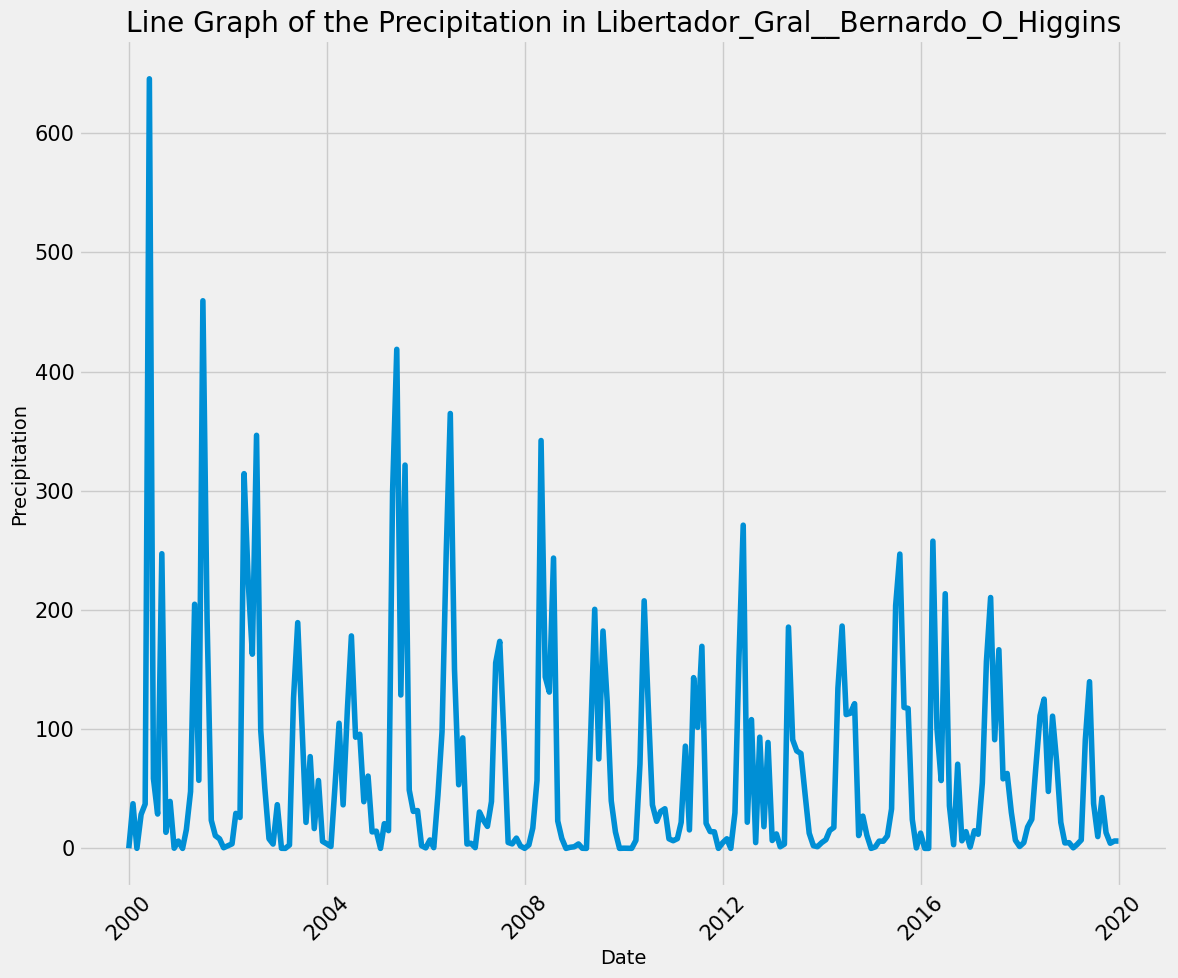

In [35]:
tempPrec, pltPrec = plot_prec_data(varClim, 'Libertador_Gral__Bernardo_O_Higgins',2000,1,2020,1)
plt.show()

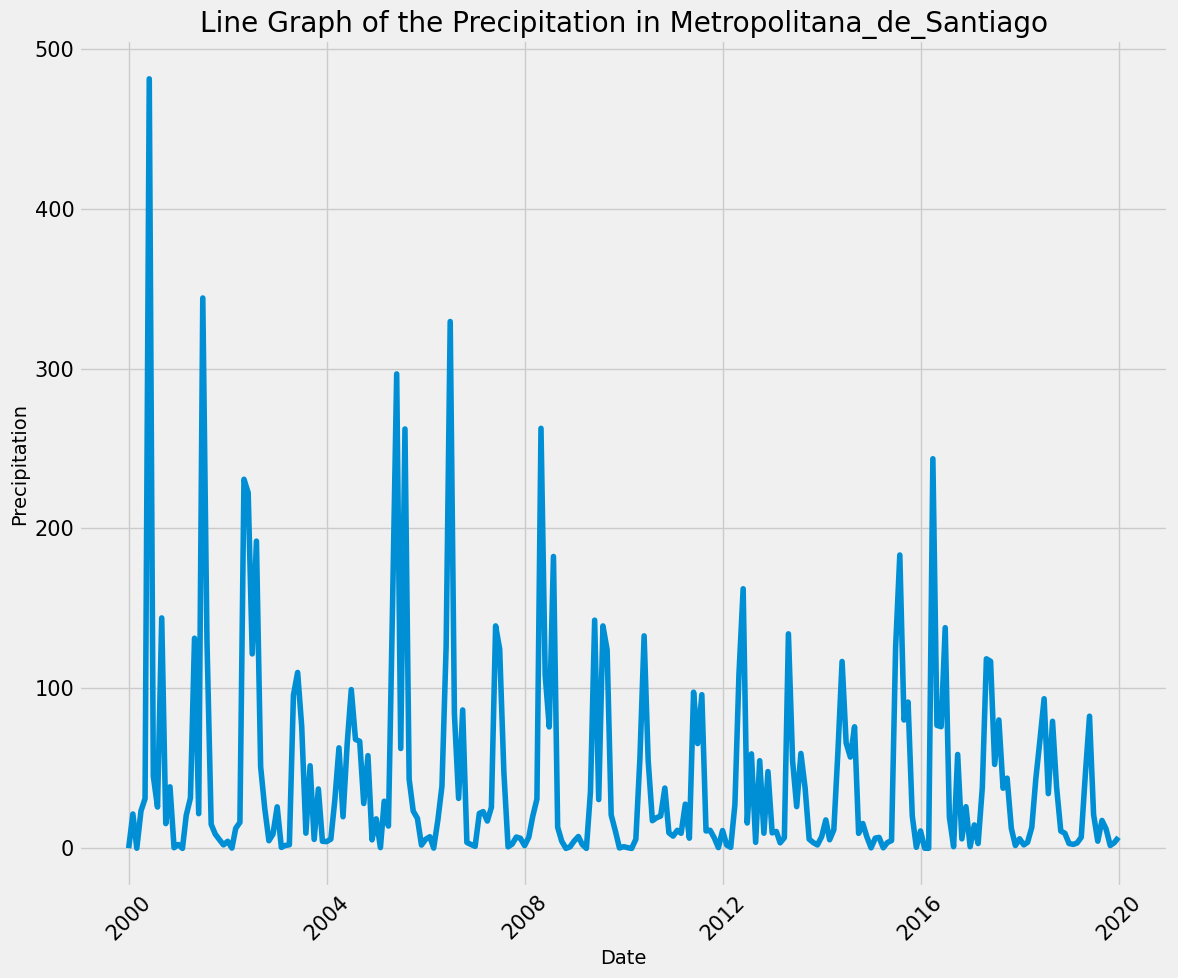

In [36]:
tempPrec2, pltPrec2 = plot_prec_data(varClim, 'Metropolitana_de_Santiago',2000,1,2020,1)
plt.show()

A time series data is stationary when it does not have a dependency on time, in other words, when there is no trend, seasonal effect, cyclicity or irregularity. 
By looking at the graph we notice that the data is not consistent over time,and there seems a trend of the precipitation values gradually decreasing over time. 

In [37]:
temp_data = tempPrec['Libertador_Gral__Bernardo_O_Higgins'].values
split = round(len(temp_data) / 2)
part1, part2 = temp_data[0:split], temp_data[split:]
mean1, mean2 = part1.mean(), part2.mean()
var1, var2 = part1.var(), part2.var()
print(f'mean1={mean1}, mean2={mean2}')
print(f'variance1={var1}, variance2={var2}')

mean1=79.3333498652919, mean2=54.675902751062935
variance1=12620.161365772377, variance2=4313.2962878978315


In [38]:
temp_data = tempPrec2['Metropolitana_de_Santiago'].values
split = round(len(temp_data) / 2)
part1, part2 = temp_data[0:split], temp_data[split:]
mean1, mean2 = part1.mean(), part2.mean()
var1, var2 = part1.var(), part2.var()
print(f'mean1={mean1}, mean2={mean2}')
print(f'variance1={var1}, variance2={var2}')

mean1=55.528579693155834, mean2=35.80269676854514
variance1=6782.307159091052, variance2=1974.4124026127254


When dividing the data in two and checking its mean and variance we can see that the mean and variance are very different. Having distinct values for this statistics indicates that the data is not constant over time. 

In [39]:
def plot_monthly_prec_data(data, group_name, years_list):
    '''
    This function plots pib of a determined range
    Args:
        - data: the complete dataset,
        - group_name: the region's name,
        - years_list: the list of years,
    '''
    assert (group_name in data.columns.values) , 'Not a valid region name'
    months = [month for month in data.index.strftime('%b').unique()]

    #unique colors
    mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years_list), replace = False)

    #plot
    fig, ax = plt.subplots()
    for index, year in enumerate(years_list): 
        ax.plot(months, data.loc[data.index.year == year , group_name], color = mycolors[index], label = year )
        ax.legend()
        ax.set_ylabel('Precipitation (mm)', fontsize=14)
        ax.set_xlabel('Month', fontsize=14)
        ax.set_title('Line Graphs of the Precipitation in '+group_name)
        ax.tick_params(axis='x', labelrotation=45)
        fig.tight_layout()



    return plt.show()

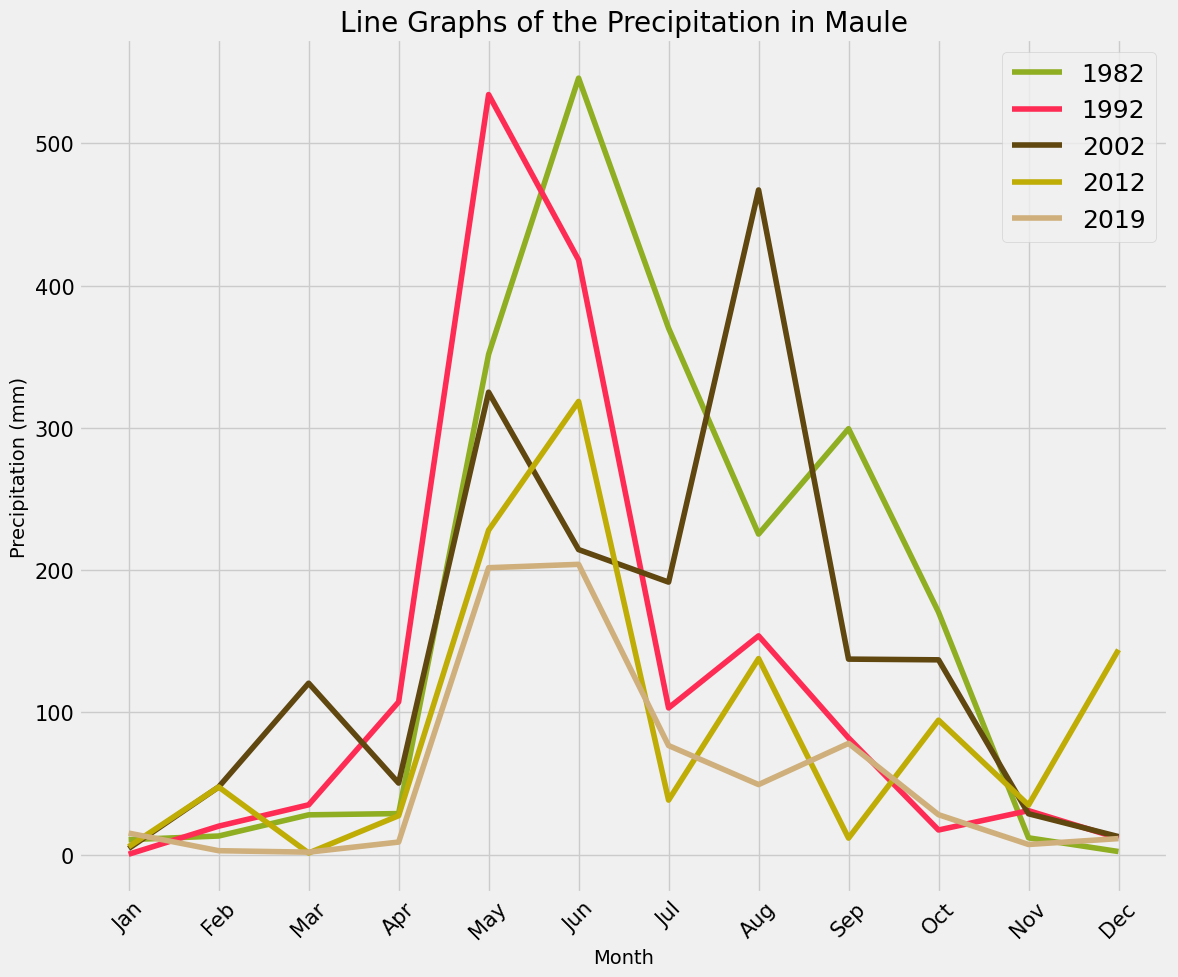

In [40]:
plot_monthly_prec_data(varClim, 'Maule', [1982,1992,2002,2012,2019])

**Multiple Years Graph Analysis** 

Overall, the graph illustrates three main insights for the behavior of precipitation for Maule's region: a decrease of the average precipitation, a decrease of precipitation coverage, and a change in the months when the maximum peak value occurred.

- In this graph, we can clearly see how the value of precipitation has decreased through the decades. At the start of the period is when the maximum value of precipitation was reported, reaching almost 550mm. This value fell from the initial decade in 1982 to the final one in 2019, where the value reached its maximum of only 200mm, a significant reduction of 63%.

- Next, the data exhibits a seasonal pattern showing that the highest values for precipitations in Maule's region commonly occurs during the second and third quarter of the year. However, we can see that the precipitation window has also been affected through the decades, ahowing a coverage of almost five months in the initial period and only covering a month for the final decade. 

- Lastly, the line graph displays a variation of the months when the precipitation was at its highest. In the first period, the maximum value was reported in June. A decade later, this peak value was found a month earlier, but this was slightly lower than the previous decade. In 2002, the peak was delayed and found until August, and the value was significantly lower than the last two decades. Once more, in 2012, this value decreased, and the decrease was the largest of the previously observed. For this decade, the maximum precipitation was found in June. Finally, for 2019 the maximum precipitation value was identified during May, where the data plateaued for a month and then decreased.


In [41]:
def plot_pib(data, group_name, initial_date_year, initial_date_month, final_date_year, final_date_month):
    '''
    This function plots pib of a determined range
    Input:
        - data: the complete dataset,
        - group_name: the column name of the pib to plot,
        - initial_date_year: the initial year to plot in number format,
        - initial_date_month: the initial month to plot in number format,
        - final_date_year: the final year to plot in number format.
    '''
    assert (group_name in data.columns.values) and (initial_date_year in data.index.year) and (final_date_year in data.index.year), 'Choose a valid group name, initial date, and final date'

    temp = data.loc[str(initial_date_year)+'-'+str(initial_date_month)+'-1':str(final_date_year)+'-'+str(final_date_month)+'-1']
    
    fig, ax = plt.subplots()
    ax.plot(temp.index,temp[group_name])
    ax.set_ylabel('PIB', fontsize=14)
    ax.set_xlabel('Date', fontsize=14)
    ax.set_title('Line Graph of '+group_name)
    ax.tick_params(axis='x', labelrotation=45)
    fig.tight_layout()

    return None

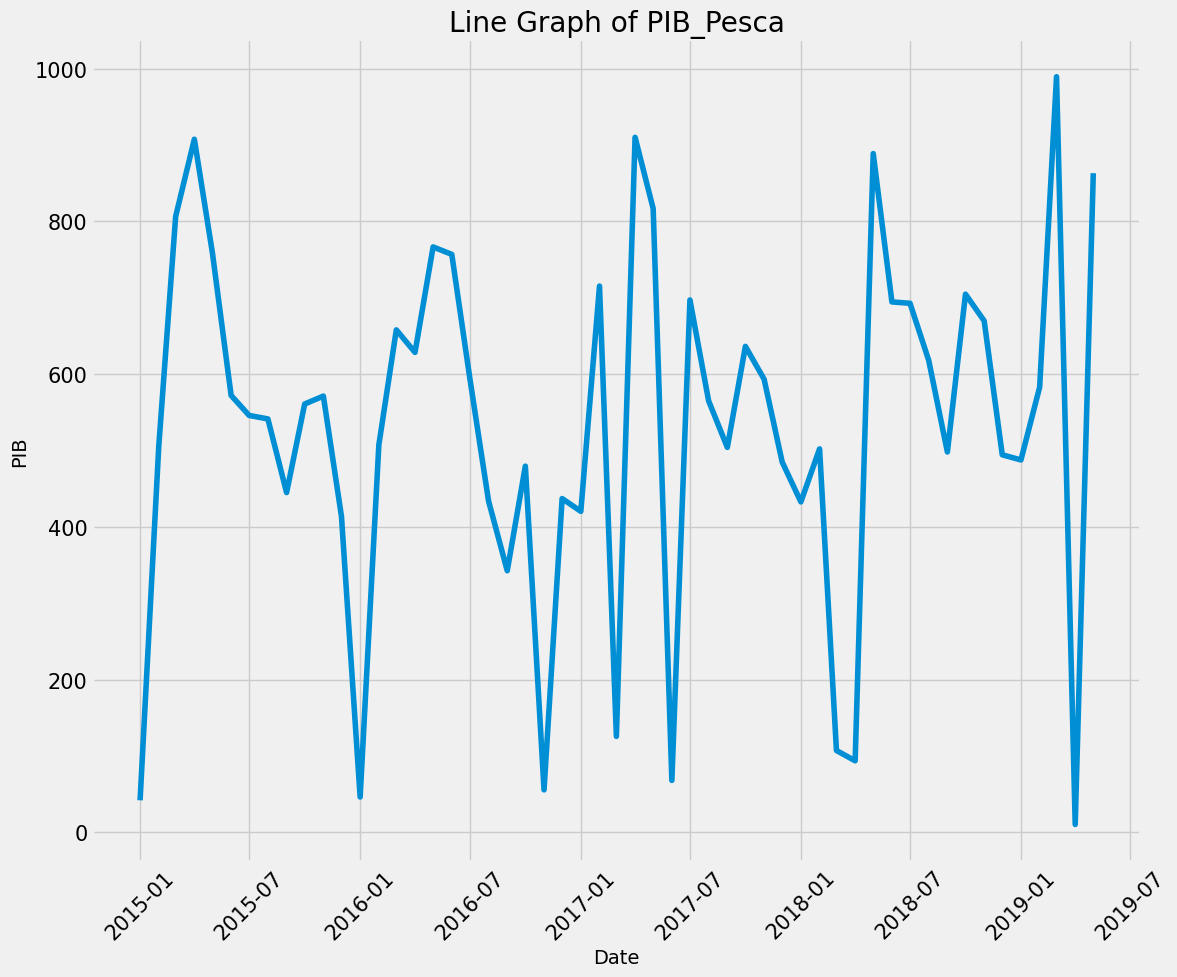

In [42]:
plot_pib(varMacr, 'PIB_Pesca', 2015, 1,2019, 5)

**PIB_pesca Graph Analysis** 


The graph shows that the time series data for the PIB_pesca variables have seasonality; there seems to be a cycle in the first quarter of the years. Additionally, the maximum value has remained very similar through the different years, despite a slightly positive trend.

In [43]:
def plot_pib_agrosilva_servi(data):
    '''
    This function plots pib of a determined range
    Input:
        - data: the complete dataset,
        - group_name: the column name of the pib to plot,
        - initial_date_year: the initial year to plot in number format,
        - initial_date_month: the initial month to plot in number format,
        - final_date_year: the final year to plot in number format.
    '''

    temp = data.loc['2013-1-1':,['PIB_Agropecuario_silvicola','PIB_Servicios_financieros']]
    
    fig, ax = plt.subplots()
    ax.plot(temp.index, temp['PIB_Agropecuario_silvicola'], label='PIB Agropecuario Silvicola')
    ax.plot(temp.index, temp['PIB_Servicios_financieros'], label='PIB Serivicios Financieros')
    ax.legend(loc='best')
    ax.set_ylabel('PIB', fontsize=14)
    ax.set_xlabel('Date', fontsize=14)
    ax.set_title('Line Graph of PIB')
    ax.tick_params(axis='x', labelrotation=45)
    fig.tight_layout()

    return None

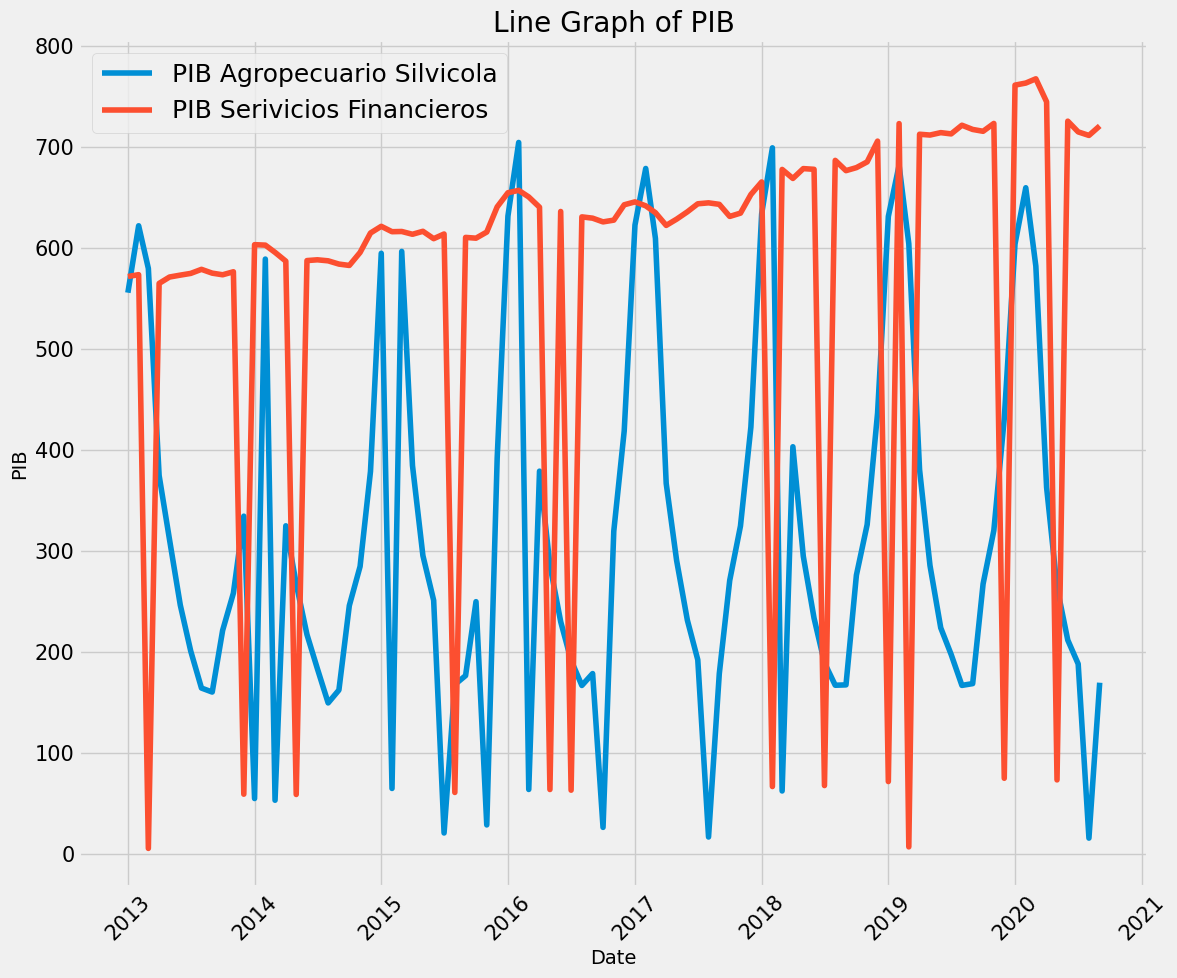

In [44]:
plot_pib_agrosilva_servi(varMacr)

**PIB Graph Analysis** 

The red line graph illustrates a positive trend of the variable "financial services PIB". The "Agropecuario Silvicola PIB", on the other hand, seems to have a seasonal component; there is a repeating cycle for the analyzed years. Furthermore, there seems to be a correlation between the two series; the Agropecuario Silvicola PIB's peaks match the financial services PIB's rising trend.

### Merging the three Dataframes

Before merging the dataframes, we will add a pre-fix to the precipitations variables

In [45]:
df = precios.merge(varClim.add_prefix('precipitation_'), left_index = True, right_index = True)

In [46]:
df = df.merge(varMacr, left_index = True, right_index = True)

### Handling Missing Values

In [47]:
df.fillna(np.nan, inplace = True)

In [48]:
print('The total number of variables is:', df.shape[1])
print('The total number of rows is:', df.shape[0])

The total number of variables is: 93
The total number of rows is: 496


In [49]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[(missing_data.Percent >= 0.80)]['Total'].count()

56

In [50]:
missing_data.head(30)

Total   Percent
No_sabe__No_responde_Miles_de_personas                492  0.991935
Indice_de_ventas_comercio_real_no_durables_IVCM       420  0.846774
Indice_de_ventas_comercio_real_IVCM                   420  0.846774
Indice_de_ventas_comercio_real_durables_IVCM          420  0.846774
Indice_de_produccion_industrial_electricidad__g...    420  0.846774
Ocupacion_en_Actividades_de_servicios_administr...    410  0.826613
Ocupacion_en_Actividades_de_alojamiento_y_de_se...    410  0.826613
Ocupacion_en_Transporte_y_almacenamiento_INE          410  0.826613
Ocupacion_en_Informacion_y_comunicaciones_INE         410  0.826613
Ocupacion_en_Actividades_financieras_y_de_segur...    410  0.826613
Ocupacion_en_Actividades_inmobiliarias_INE            410  0.826613
Ocupacion_en_Suministro_de_electricidad_INE           410  0.826613
Ocupacion_en_Actividades_profesionales_INE            410  0.826613
Ocupacion_en_Suministro_de_agua_evacuacion_de_a...    410  0.826613
Ocupacion_en_Industrias_manufactureras_INE            410  0.826613
Ocupacion_en_Explotacion_de_minas_y_canteras_INE      410  0.826613
Ocupacion_en_Agricultura_INE                          410  0.826613
Ocupacion_en_Construccion_INE                         410  0.826613
Ocupacion_en_Comercio_INE                             410  0.826613
Ocupacion_en_Administracion_publica_y_defensa_INE     410  0.826613
Ocupacion_en_Enseanza_INE                             410  0.826613
Ocupacion_en_Actividades_de_atencion_de_la_salu...    410  0.826613
Ocupacion_en_Actividades_artisticas_INE               410  0.826613
Ocupacion_en_Otras_actividades_de_servicios_INE       410  0.826613
Ocupacion_en_Actividades_de_los_hogares_como_em...    410  0.826613
Ocupacion_en_Actividades_de_organizaciones_y_or...    410  0.826613
PIB_a_costo_de_factores                               408  0.822581
PIB_Electricidad                                      408  0.822581
PIB_Construccion                                      408  0.822581
PIB                                                   408  0.822581

There were 56 columns out of 93 with more than 80% of missing data. We could perform various methods for managing missing values; the following two approaches come to mind: 

- Removing all variables with more than 50% of missing values.
- Removing rows based on the percentage of missing values grouped by year's ranges and then removing variables with more than 50% of missing values

In this analysis, we will evaluate the second approach.

In [51]:
missing = df.isnull().groupby(df.index.year // 5 * 5).sum().sum(axis = 1)
percent = missing/ missing.sum()
missing_data = pd.concat([missing, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total   Percent
Date                 
1975    960  0.033951
1980   4751  0.168022
1985   4632  0.163814
1990   4512  0.159570
1995   3996  0.141321
2000   3660  0.129438
2005   3573  0.126362
2010   2132  0.075400
2015     60  0.002122
2020      0  0.000000

The years that are dropped are those before 1995.

In [52]:
df = df.loc[df.index.year > 1995]

In [53]:
missing = df.isnull().groupby(df.index.year // 5 * 5).sum().sum(axis = 1)
percent = missing/ missing.sum()
missing_data = pd.concat([missing, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total   Percent
Date                 
1995   3108  0.247985
2000   3660  0.292029
2005   3573  0.285087
2010   2132  0.170111
2015     60  0.004787
2020      0  0.000000

In [54]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[:10]

Total   Percent
No_sabe__No_responde_Miles_de_personas                288  0.986301
Indice_de_ventas_comercio_real_no_durables_IVCM       216  0.739726
Indice_de_ventas_comercio_real_IVCM                   216  0.739726
Indice_de_ventas_comercio_real_durables_IVCM          216  0.739726
Indice_de_produccion_industrial_electricidad__g...    216  0.739726
Ocupacion_en_Actividades_de_servicios_administr...    206  0.705479
Ocupacion_en_Actividades_de_alojamiento_y_de_se...    206  0.705479
Ocupacion_en_Transporte_y_almacenamiento_INE          206  0.705479
Ocupacion_en_Informacion_y_comunicaciones_INE         206  0.705479
Ocupacion_en_Actividades_financieras_y_de_segur...    206  0.705479

Then we remove columns with more than 50% of missing values to avoid inserting noise. 

In [55]:
frac = len(df) * 0.5
df= df.dropna(thresh=frac, axis=1)

In [56]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[(missing_data.Percent >= 0.50)]['Total'].count()

0

In [57]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

Total   Percent
Precio_del_propano_centavos_de_dolargalon_DTN         144  0.493151
Precio_del_diesel_centavos_de_dolargalon              129  0.441781
Precio_del_petroleo_Brent_dolaresbarril                48  0.164384
Precio_del_gas_natural_dolaresmillon_de_unidade...     48  0.164384
Precio_del_kerosene_dolaresm3                          48  0.164384
Generacion_de_energia_electrica_CDEC_GWh               36  0.123288
precipitation_Libertador_Gral__Bernardo_O_Higgins       0  0.000000
precipitation_Maule                                     0  0.000000
precipitation_Metropolitana_de_Santiago                 0  0.000000
Imacec_resto_de_bienes                                  0  0.000000

### Missing Value Imputation

There are still 6 variables with missing values. To deal with this we will fill the missing values using the mean of the nearest neighbors. For this we used the machine learning technique of KNN and 3 nearest neighbors. 

In [60]:
from fancyimpute import KNN

In [61]:
df_knn = df.copy()


In [62]:
df_knn.isna().sum().sort_values(ascending=False)

Precio_del_propano_centavos_de_dolargalon_DTN                           144
Precio_del_diesel_centavos_de_dolargalon                                129
Precio_del_petroleo_Brent_dolaresbarril                                  48
Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas     48
Precio_del_kerosene_dolaresm3                                            48
Generacion_de_energia_electrica_CDEC_GWh                                 36
precipitation_Libertador_Gral__Bernardo_O_Higgins                         0
precipitation_Maule                                                       0
precipitation_Metropolitana_de_Santiago                                   0
Imacec_resto_de_bienes                                                    0
precipitation_Valparaiso                                                  0
precipitation_Coquimbo                                                    0
precipitation_Biobio                                                      0
precipitatio

In [63]:
#Create Imputer
imputer = KNN()
# Impute 
df_knn.iloc[:,:] = np.round(imputer.fit_transform(df))

Imputing row 1/292 with 6 missing, elapsed time: 0.034
Imputing row 101/292 with 2 missing, elapsed time: 0.042
Imputing row 201/292 with 0 missing, elapsed time: 0.046


In [64]:
total = df_knn.isnull().sum().sort_values(ascending=False)
percent = (df_knn.isnull().sum()/df_knn.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

Total  Percent
Generacion_de_energia_electrica_CDEC_GWh            0      0.0
precipitation_Los_Rios                              0      0.0
Imacec_comercio                                     0      0.0
Imacec_resto_de_bienes                              0      0.0
Imacec_industria                                    0      0.0
Imacec_minero                                       0      0.0
Imacec_produccion_de_bienes                         0      0.0
Imacec_empalmado                                    0      0.0
precipitation_La_Araucania                          0      0.0
Indice_de_produccion_industrial__manufacturera      0      0.0

In [65]:

df = df_knn.copy()

## Data Wrangling


### Including Additional Features

One potential useful variable for the prediction of our target variable, 'Milk's Price, is the Customer Price Index (CPI). We have obtained the value of this data, for the different dates, from Chile's National Statistics Institution (IFE) official webpage and joined it with our dataset.

In [66]:
ipc_df = pd.read_csv('Data/ipc_data.csv')
ipc_df['Date'] = ipc_df['Date'].apply(pd.to_datetime)
ipc_df = ipc_df.set_index(pd.DatetimeIndex(ipc_df['Date'], tz = None)).drop('Date',axis = 1)
ipc_df = ipc_df.sort_index()
df = pd.merge(df, ipc_df, left_index=True, right_index=True)

### Differencing

We want to know whether variations in a  time series are correlated with variations in another. For this, the autocorrelation of the variables must be constant over time; thus, it needs to be stationary. To ensure stationarity, we will apply the differencing method and evaluate it with a statistical test. To test for stationarity, we use the statistical test called "Unit Root Test".  WE will use these tests' most commonly used, the Augmented Dickey-Fuller test (ADH Test). The null hypothesis of this test states that the data is non-stationary. 

In [67]:
def check_stationarity(data, verbose = True):
    result = adfuller(np.array(data))
    if verbose != False:
        print('ADF Statistic: '+str(result[0]))
        print('p-value: '+str(result[1]))
    return result[1]

In [68]:
def differencing(data):
    non_stationary_data = []
    for var in data.columns:
        print(f'Variable: {var}')
        data[var] = data[var] - data[var].shift(1)
        # Fill missing values with a forward fill method
        data[var].fillna(method='bfill', inplace=True)
        #testing for stationarity
        pv = check_stationarity(data[var], verbose = False)
        if pv > 0.05:
            print('Non-stationary data')
            non_stationary_data.append(var)
    print(non_stationary_data)
    return data
    

In [69]:
diff_data = differencing(df)

Variable: Precio_leche
Variable: precipitation_Coquimbo
Variable: precipitation_Valparaiso
Variable: precipitation_Metropolitana_de_Santiago
Variable: precipitation_Libertador_Gral__Bernardo_O_Higgins
Variable: precipitation_Maule
Variable: precipitation_Biobio
Variable: precipitation_La_Araucania
Variable: precipitation_Los_Rios
Variable: Imacec_empalmado
Variable: Imacec_produccion_de_bienes
Variable: Imacec_minero
Variable: Imacec_industria
Variable: Imacec_resto_de_bienes
Variable: Imacec_comercio
Variable: Imacec_servicios
Variable: Imacec_a_costo_de_factores
Variable: Imacec_no_minero
Variable: Precio_de_la_gasolina_en_EEUU_dolaresm3
Variable: Precio_de_la_onza_troy_de_oro_dolaresoz
Variable: Precio_de_la_onza_troy_de_plata_dolaresoz
Variable: Precio_del_cobre_refinado_BML_dolareslibra
Variable: Precio_del_diesel_centavos_de_dolargalon
Variable: Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas
Variable: Precio_del_petroleo_Brent_dolaresbarril
Variable: Precio_

In [70]:
df = diff_data.copy()

The p-value in all are variables suggests there is enough statistical evidence to reject the Ho with a significance level of less than 5%. 

### Handling Outliers

We can see that most of the variables have extreme values; however, one, in particular, presents large outliers that can affect our analysis. To reduce the risk of including noise with this variable, we will transform these data points with winsorization.

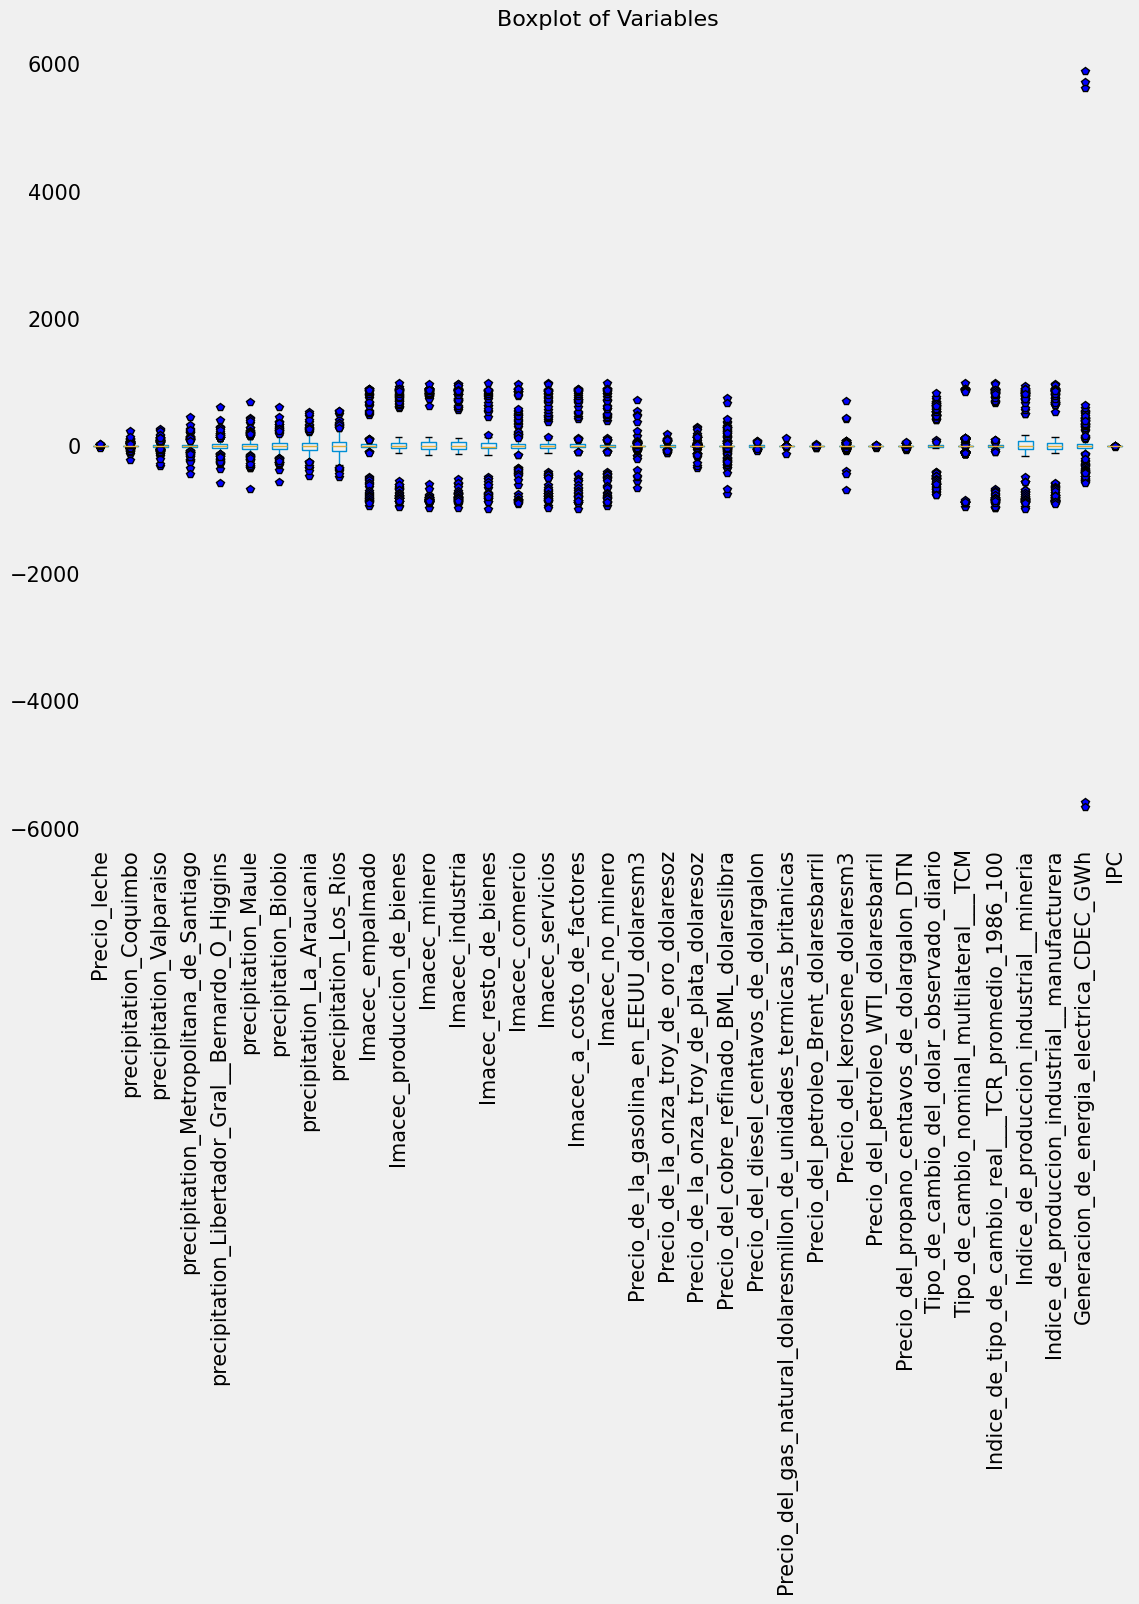

In [71]:
boxplot = df.boxplot(grid = False, flierprops = bit)
plt.title('Boxplot of Variables', fontsize = 16)
plt.tick_params(axis='x', labelrotation=90)

In [72]:
df['Generacion_de_energia_electrica_CDEC_GWh'] = winsorize(df['Generacion_de_energia_electrica_CDEC_GWh'], limits = [0.05,0.05])

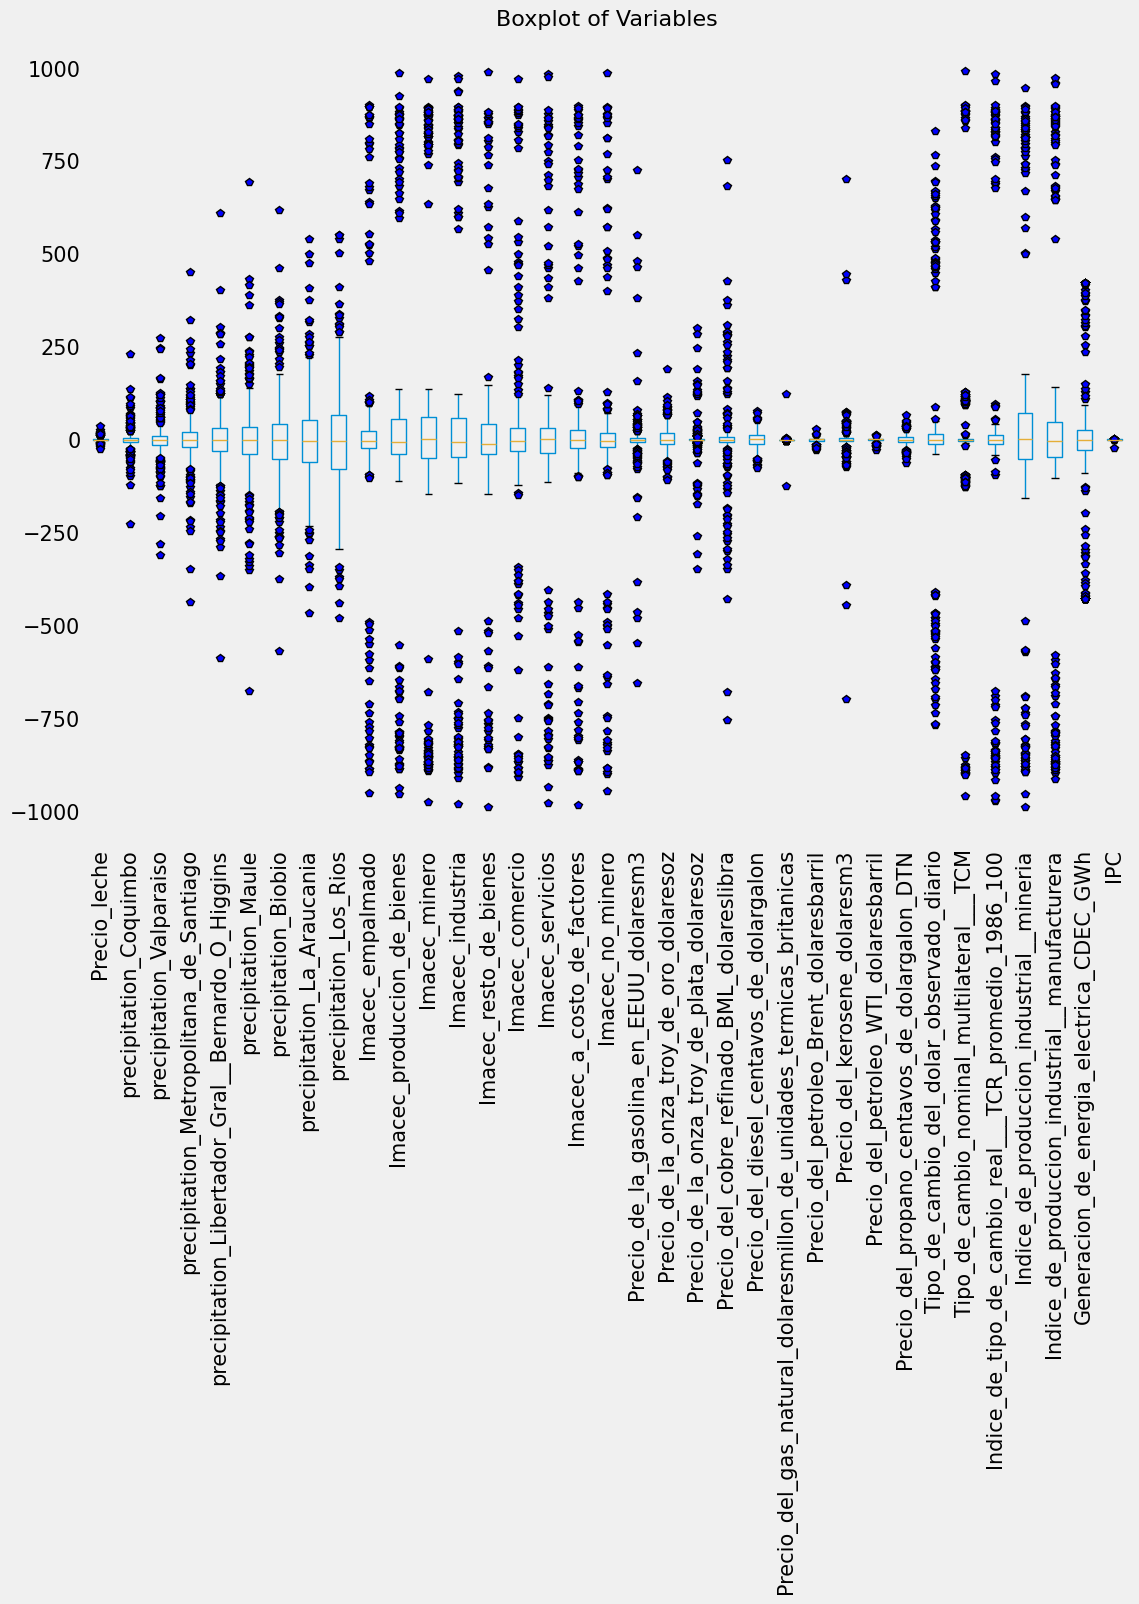

In [73]:
boxplot = df.boxplot(grid = False, flierprops = bit)
plt.title('Boxplot of Variables', fontsize = 16)
plt.tick_params(axis='x', labelrotation=90)

### Variable Correlation

 To determine the method for conducting a correlation analysis we need to check for the normality distribution of the variables. For this we will use the Shapiro-Wilks Test.

In [74]:
def test_SW(data):
    count = 0
    for var in data.columns:
        print(f'Variable: {var}')
        pv = shapiro(df[var])[0]
        print(pv)
        if pv < 0.05:
            count +=1
            print('H0 ( samples comes from a normal distribution) can be rejected')
    return f'{count} variables are not normally distributed'
    

In [75]:
test_SW(df)

Variable: Precio_leche
0.904438853263855
Variable: precipitation_Coquimbo
0.7575962543487549
Variable: precipitation_Valparaiso
0.8066531419754028
Variable: precipitation_Metropolitana_de_Santiago
0.8141484260559082
Variable: precipitation_Libertador_Gral__Bernardo_O_Higgins
0.848321795463562
Variable: precipitation_Maule
0.8711434006690979
Variable: precipitation_Biobio
0.9286277294158936
Variable: precipitation_La_Araucania
0.9456323385238647
Variable: precipitation_Los_Rios
0.9607124328613281
Variable: Imacec_empalmado
0.6835811138153076
Variable: Imacec_produccion_de_bienes
0.7770402431488037
Variable: Imacec_minero
0.8197926878929138
Variable: Imacec_industria
0.822918713092804
Variable: Imacec_resto_de_bienes
0.7169713973999023
Variable: Imacec_comercio
0.7449085712432861
Variable: Imacec_servicios
0.7402709722518921
Variable: Imacec_a_costo_de_factores
0.6912496089935303
Variable: Imacec_no_minero
0.6897367835044861
Variable: Precio_de_la_gasolina_en_EEUU_dolaresm3
0.42523902654

'0 variables are not normally distributed'

Since all variables seem to have a normal distribution,  we will proceed with a Pearson method to evaluate the correlation between variables.

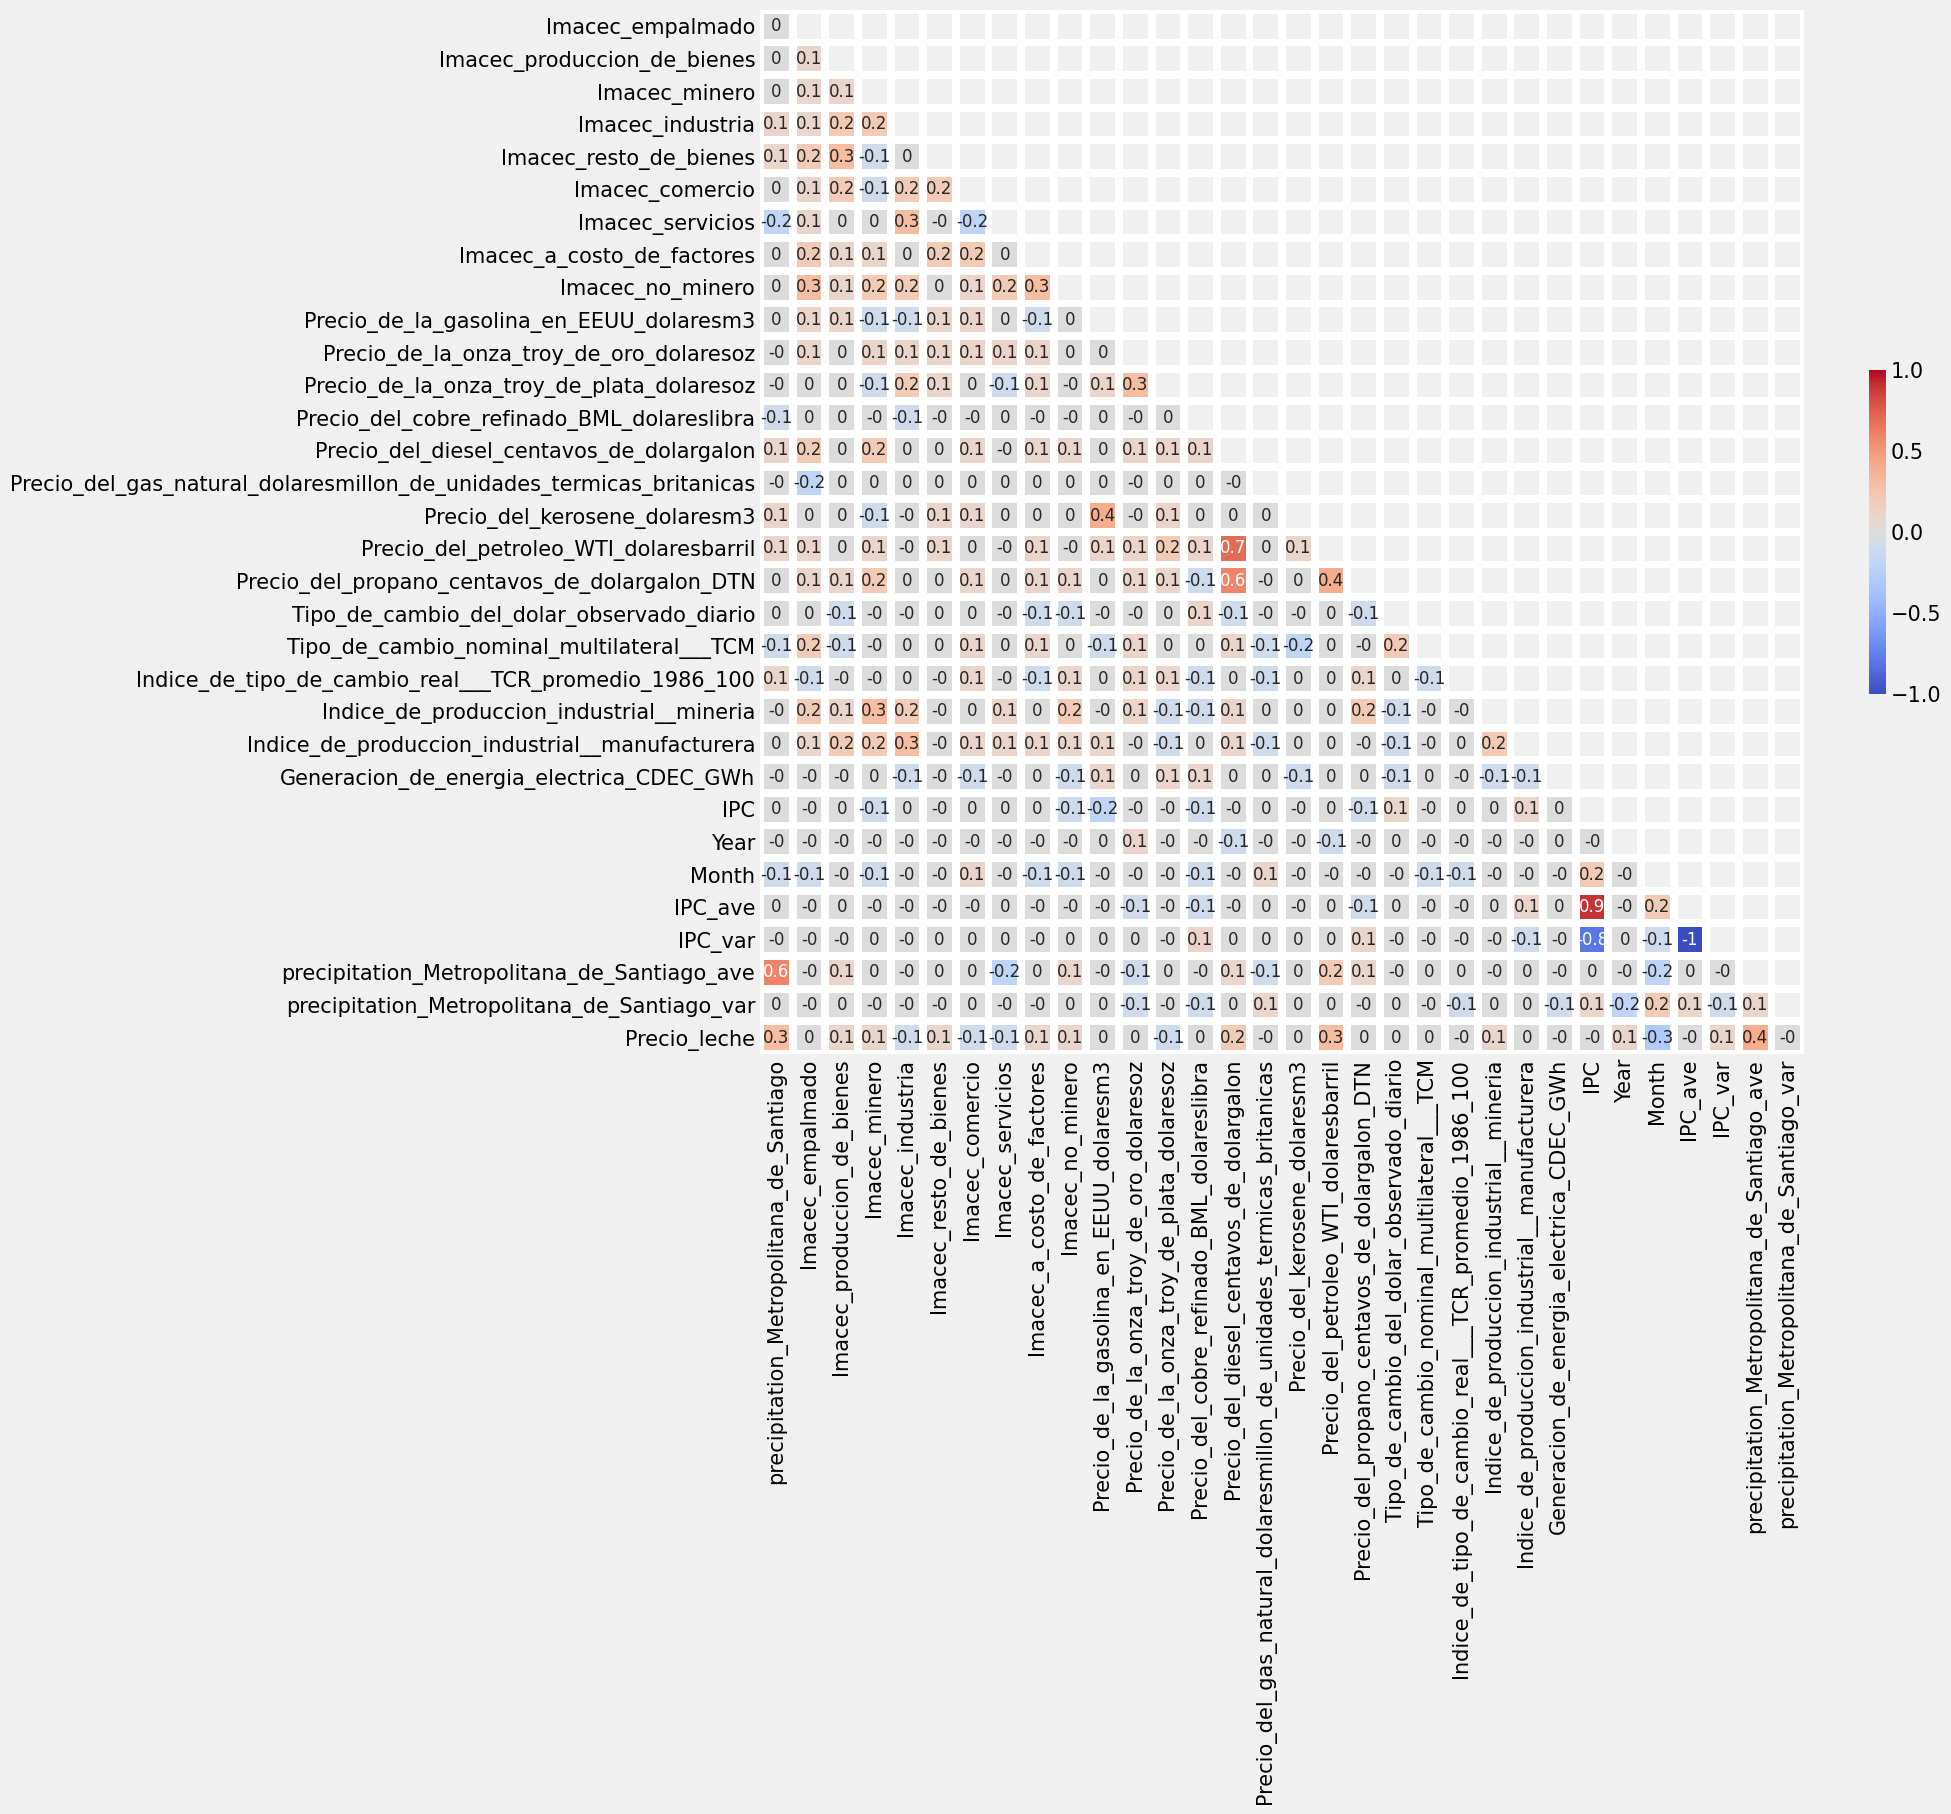

In [120]:
corr_cinc = df.corr('pearson')
corr_cinc = corr_cinc.round(1) 
fig, ax = plt.subplots(figsize=(15, 20))
mask = np.triu(np.ones_like(corr_cinc, dtype=np.bool))# adjust mask and df
mask = mask[1:, :-1]
corr = corr_cinc.iloc[1:,:-1].copy()# color map
cmap = sns.diverging_palette(200, 14, as_cmap=True)# plot heatmap
sns.heatmap(corr, center = 0 ,mask=mask, annot=True, annot_kws={"fontsize":12}, 
           linewidths=5, cmap='coolwarm', vmin=-1, vmax=1, 
           cbar_kws={"shrink": .2}, square=True)# ticks

From the Pearson Correlation heatmap, we can see that there are multicollinearity issues (considering a threshold > 0.5) in the precipitation variables. To solve this problem, we will eliminate all precipitation variables but one. 
There is also multicollinearity between the variables "Precio del Petroleo WTI" and "Precio del Petroleo Brent." Since both variables have a similar correlation value with our target variable, we will choose one of them and remove it. 

In [77]:
df.columns

Index(['Precio_leche', 'precipitation_Coquimbo', 'precipitation_Valparaiso',
       'precipitation_Metropolitana_de_Santiago',
       'precipitation_Libertador_Gral__Bernardo_O_Higgins',
       'precipitation_Maule', 'precipitation_Biobio',
       'precipitation_La_Araucania', 'precipitation_Los_Rios',
       'Imacec_empalmado', 'Imacec_produccion_de_bienes', 'Imacec_minero',
       'Imacec_industria', 'Imacec_resto_de_bienes', 'Imacec_comercio',
       'Imacec_servicios', 'Imacec_a_costo_de_factores', 'Imacec_no_minero',
       'Precio_de_la_gasolina_en_EEUU_dolaresm3',
       'Precio_de_la_onza_troy_de_oro_dolaresoz',
       'Precio_de_la_onza_troy_de_plata_dolaresoz',
       'Precio_del_cobre_refinado_BML_dolareslibra',
       'Precio_del_diesel_centavos_de_dolargalon',
       'Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas',
       'Precio_del_petroleo_Brent_dolaresbarril',
       'Precio_del_kerosene_dolaresm3',
       'Precio_del_petroleo_WTI_dolaresbarril',

In [78]:
df.drop(['precipitation_Coquimbo','precipitation_Valparaiso','precipitation_Libertador_Gral__Bernardo_O_Higgins','precipitation_Maule','precipitation_Biobio','precipitation_La_Araucania','precipitation_Los_Rios','Precio_del_petroleo_Brent_dolaresbarril'], axis = 1, inplace = True)

### Feature Scaling

Standardizing involves rescaling the values so that the mean is 0 and the standard deviation is one, and so when building a forecasting model, the contribution of the features is proportional. This process is required for machine learning methods, and it is used to normalize the time-series data when the inputs have different scales. This technique will be used to scale the date before modeling.

In [80]:
def scale_data(data):
    scaled_df = data.copy()
    #train scaler
    scaler = StandardScaler()
    scaler = scaler.fit(scaled_df.values)
    #standadize
    scaled_features= scaler.transform(scaled_df.values)
    scaled_df = pd.DataFrame(scaled_features, index = data.index, columns = data.columns)
    return scaled_df,scaler
def inverse_scale(data, scaler):
    inversed = scaler.inverse_transform(data)
    inversed_df = pd.DataFrame(inversed, index = data.index, columns = data.columns)
    return inversed_df

### Feature Engineering

In this section we added Month, Year, and Quarter as features obtained from the date time index.

In [83]:
df['Year'] = df.index.year
df['Month'] = df.index.month
j = 4
df['Quarter'] = ''
for i in range(1,5):
    if i == 1:
        df.loc[(df.Month >= 1)&(df.Month <= 3),'Quarter'] = i
    else:
        df.loc[(df.Month >= j)&(df.Month <= j+2),'Quarter'] = i
        j+=3

Then we created the moving average and moving variance of two features of interest: IPC and Precipitation. This features where selected as they have the highest correlation with the target variable. 

In [84]:
def filter_column(x, k_size, type_):
    '''
    Input: x = array to transform
            k = size of the kernel
            type = type of filter median or mean
    Output: array of filtered column. The boundaries are calculated by repeating the endpoint.
    '''
    assert k_size % 2 == 1, 'Kernel size must be odd.'

    k2 = (k_size - 1) // 2
    y = np.zeros ((len (x), k_size), dtype=x.dtype)
    y[:,k2] = x
    for i in range (k2):
        j = k2 - i
        y[j:,i] = x[:-j]
        y[:j,i] = x[0]
        y[:-j,-(i+1)] = x[j:]
        y[-j:,-(i+1)] = x[-1]
    if type_ == 'mean':
        return np.mean(y, axis=1)
    elif type_ =='var':
        return np.var(y, axis=1)

In [85]:
columns_ave_var = ['IPC','precipitation_Metropolitana_de_Santiago']
for column in columns_ave_var:
    df[column+'_ave'], df[column+'_var'] = filter_column(df[column].values,3,'mean'), filter_column(df[column].values,3,'var')

The dataset must be structured as a supervised learning problem to feed the time-series data to the machine learning model.
For this purpose, the following function was used to transform a multivariate time series into a supervised learning dataset. This function will be used in the modelling phase to create the lags. 

In [86]:
#The function was constructed based on the work of Jason Brownie tutorials extracted from: https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    # Get the number of variables in the dataset
    if type(data) == list:
        n_vars = 1
    else:
        n_vars = data.shape[1]
    #n_vars = 1 if type(data) is list else data.shape[1]
    # Convert the data to a dataframe if it is not.
    df = pd.DataFrame(data)
    # Initialize temporary lists that will append the shifted columns
    columns, var_name = list(), list()
    # Append columns with the number of input sequence and shift the data everytime a column is created
    for i in range(n_in, 0, -1):
        columns.append(df.shift(i))
        var_name += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # Append columns for present and future forecast with the inverse of the shift function
    for i in range(0, n_out):
        columns.append(df.shift(-i))
        if i == 0:
            var_name += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            var_name += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # Concatenate all the columns
    agg = pd.concat(columns, axis=1)
    agg.columns = var_name
    # drop rows with missing values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [87]:
series_to_supervised(df,2,1)

var1(t-2)  var2(t-2)  var3(t-2)  var4(t-2)  var5(t-2)  var6(t-2)  \
Date                                                                           
1996-03-01        3.0       -4.0       -6.0        3.0       20.0      -30.0   
1996-04-01        3.0       -4.0       -6.0        3.0       20.0      -30.0   
1996-05-01        3.0        0.0       51.0       50.0       28.0       78.0   
1996-06-01        2.0       33.0      -20.0      -59.0        7.0      -37.0   
1996-07-01        5.0      -21.0        0.0       -6.0       21.0        6.0   
...               ...        ...        ...        ...        ...        ...   
2019-12-01        1.0       -5.0        2.0     -860.0       -1.0     -863.0   
2020-01-01        8.0      -10.0        3.0        5.0       -1.0        4.0   
2020-02-01        3.0        2.0        9.0       14.0       12.0        5.0   
2020-03-01        0.0        3.0      -12.0      -14.0      858.0       -5.0   
2020-04-01       16.0       -7.0       -3.0       -1.0       -1.0       -6.0   

            var7(t-2)  var8(t-2)  var9(t-2)  var10(t-2)  ...  var25(t)  \
Date                                                     ...             
1996-03-01       26.0        7.0      -13.0        -6.0  ...     645.0   
1996-04-01       26.0        7.0      -13.0        -6.0  ...     -24.0   
1996-05-01       27.0       44.0       57.0        55.0  ...       2.0   
1996-06-01      -94.0      -30.0        5.0       -21.0  ...     -44.0   
1996-07-01      -26.0     -342.0        4.0      -454.0  ...      53.0   
...               ...        ...        ...         ...  ...       ...   
2019-12-01     -804.0      895.0     -106.0         2.0  ...       2.0   
2020-01-01        9.0     -895.0      106.0         3.0  ...      -2.0   
2020-02-01       24.0       34.0       -2.0         8.0  ...      -6.0   
2020-03-01      -20.0      -14.0       -8.0       -11.0  ...      11.0   
2020-04-01        3.0       -2.0       -5.0        -3.0  ...     869.0   

            var26(t)  var27(t)  var28(t)  var29(t)  var30(t)  var31(t)  \
Date                                                                     
1996-03-01     -41.0     0.431      1996         3         1  0.447667   
1996-04-01     -81.0     0.606      1996         4         2  0.508667   
1996-05-01       9.0     0.489      1996         5         2  0.450333   
1996-06-01     109.0     0.256      1996         6         2  0.307667   
1996-07-01      -7.0     0.178      1996         7         3  0.232000   
...              ...       ...       ...       ...       ...       ...   
2019-12-01     421.0     0.110      2019        12         4  0.256667   
2020-01-01      12.0     0.580      2020         1         1  0.386667   
2020-02-01    -428.0     0.470      2020         2         1  0.466667   
2020-03-01     396.0     0.350      2020         3         1  0.256667   
2020-04-01    -428.0    -0.050      2020         4         2  0.083333   

            var32(t)   var33(t)     var34(t)  
Date                                          
1996-03-01  0.015139   9.666667   274.888889  
1996-04-01  0.005298   4.000000   494.000000  
1996-05-01  0.021164  19.333333   841.555556  
1996-06-01  0.017455  -1.333333  1130.888889  
1996-07-01  0.001464  30.333333  1890.888889  
...              ...        ...          ...  
2019-12-01  0.052422  -1.666667    34.888889  
2020-01-01  0.040289  -0.666667    20.222222  
2020-02-01  0.008822  -1.333333    17.555556  
2020-03-01  0.049422   3.000000    92.666667  
2020-04-01  0.035556  10.666667    56.888889  

[290 rows x 102 columns]

### Smoothening Function

A simple exponential smoothening technique can be used to remove noisy data. 

In [88]:

def smoothing(data, columns_to_smooth, smoothing_param, plot=False):
    if plot == True:
        fig, ax = plt.subplots()
        ax.plot(data.index, data['Precio_leche'], label='Milk Price')

    for X in columns_to_smooth:
        model = SimpleExpSmoothing(data[X].values).fit(smoothing_level=smoothing_param)
        data[X] = model.fittedvalues
        
    if plot == True:
        ax.plot(data.index, data['Precio_leche'], label='Smooth Milk Price')
        ax.legend(loc='best')
        ax.set_ylabel('Price')
        ax.set_xlabel('Date')
        ax.set_title('Line Graph of Milk')
        ax.tick_params(axis='x', labelrotation=45)
        fig.tight_layout()

    return data

Precio_leche  precipitation_Metropolitana_de_Santiago  \
Date                                                                
1996-01-01      2.904941                                 0.000000   
1996-02-01      2.952470                                -2.000000   
1996-03-01      2.976235                                -3.000000   
1996-04-01      2.988118                                -1.500000   
1996-05-01      2.494059                                15.750000   
...                  ...                                      ...   
2019-12-01      1.448009                                -6.797465   
2020-01-01      2.224004                                -2.398732   
2020-02-01      1.112002                                 0.300634   
2020-03-01      8.556001                                -3.349683   
2020-04-01      9.278001                                -1.674842   

            Imacec_empalmado  Imacec_produccion_de_bienes  Imacec_minero  \
Date                                                                       
1996-01-01          0.334629                     3.500000      15.365744   
1996-02-01         -2.832685                     3.250000      17.682872   
1996-03-01         -4.416343                     3.125000      18.841436   
1996-04-01         23.291829                    26.562500      23.420718   
1996-05-01          1.645914                   -16.218750      15.210359   
...                      ...                          ...            ...   
2019-12-01          2.240090                  -101.743433      -5.441586   
2020-01-01          5.620045                   -43.871716       3.279207   
2020-02-01         -3.189978                   -28.935858     430.639603   
2020-03-01         -3.094989                   -14.967929     214.819802   
2020-04-01          1.952506                    -4.983965    -326.090099   

            Imacec_industria  Imacec_resto_de_bienes  Imacec_comercio  \
Date                                                                    
1996-01-01          0.000000               15.652406         2.975000   
1996-02-01        -15.000000               20.826203         4.987500   
1996-03-01        -22.500000               23.413102         5.993750   
1996-04-01         27.750000               25.206551        24.996875   
1996-05-01         -4.625000              -34.396725        -2.501563   
...                      ...                     ...              ...   
2019-12-01       -105.091932             -149.602206      -223.670737   
2020-01-01        -50.045966              -62.801103       -94.835368   
2020-02-01        -27.522983              -41.400551       -54.417684   
2020-03-01        -16.761491              -19.200276       -28.208842   
2020-04-01         -5.880746               -7.600138       -13.604421   

            Imacec_servicios  Imacec_a_costo_de_factores  ...  \
Date                                                      ...   
1996-01-01          0.000000                    0.000000  ...   
1996-02-01         -6.500000                   -3.000000  ...   
1996-03-01         -9.750000                   -4.500000  ...   
1996-04-01         23.625000                   25.250000  ...   
1996-05-01         14.312500                    2.125000  ...   
...                      ...                         ...  ...   
2019-12-01         26.277826                    1.637950  ...   
2020-01-01         12.138913                    4.818975  ...   
2020-02-01          2.069456                   -3.090512  ...   
2020-03-01         -1.465272                   -3.045256  ...   
2020-04-01          4.267364                    1.977372  ...   

            Indice_de_produccion_industrial__manufacturera  \
Date                                                         
1996-01-01                                       74.062616   
1996-02-01                                       34.531308   
1996-03-01                                       14.765654   
1996-04-01         

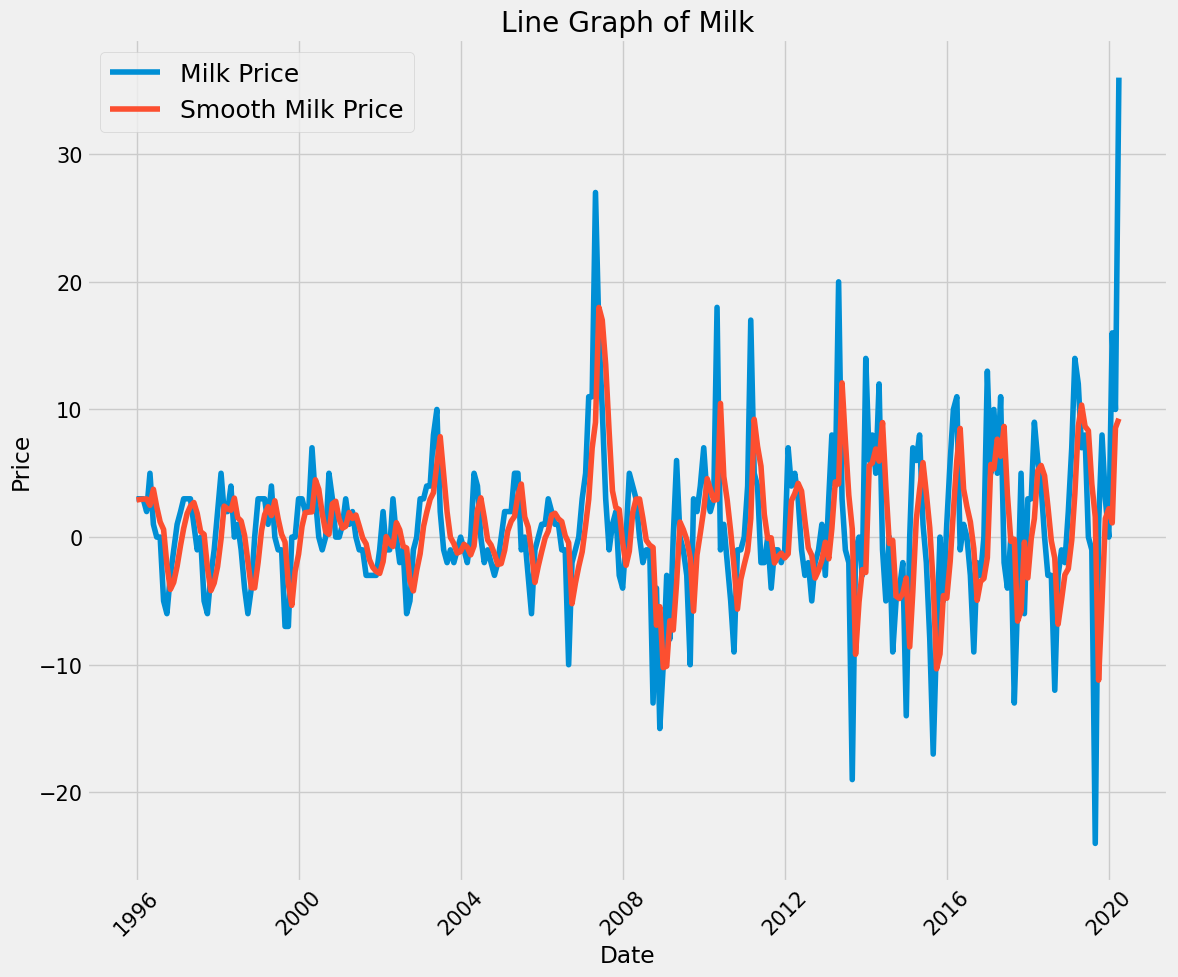

In [89]:
smoothing(df, [name for name in df.columns.values if name not in ['Year','Month','Quarter']], 0.5, plot=True)

## Modelling  and Evaluation

We want to fit data to a time series model and use the model to make a forecast for next month's milk price. For this, we will use a recurrent neural network, an LSTM network. The main characteristic of this architecture is that the output layer has a connection with the input layer, which enables remembering patterns for long durations of time.

**Train-Test Split**

The train and test split selected for the evaluation of the model was  80 % training and 20% validation. A cross-validation is not commonly used in deep neural networks because of the cost associated for training. 




** Evaluation Metrics **

We will use the following metrics for the evaluation of our result: 
- The Root Mean Squared Error (RMSE): obtained in order to measure how close the fitted values are to the real values. 
- The Akaike information criterion (AIC) is used to obtain the estimated likelihood to predict a model, and penalizes the model when it is overfitting the data. A low AIC indicates a less tendency to overfit. This AIC can be used to compare the results with other models. 


In [90]:
def calculate_aic(n, mse, num_params):
    
    return n * np.log(mse) + 2 * num_params

In [93]:
tensorflow.keras.backend.clear_session()

In [193]:
def model_lstm(data, lag, neuron1, neuron2, batch_size, epochs):
    # Create a copy of the dataset
    df = data.drop(['Month','Year','Quarter'],axis=1).copy()
    # Get the number of variables of dataset
    n_var = len(df.columns)
    # Create scaler
    train_scaler = StandardScaler()
    # Fit the scaler with the train dataset
    train_scaler.fit(df)
    # Normalize the features with train set parameters
    df_norm = train_scaler.transform(df)
    # Create supervised problem
    df_norm_sup = series_to_supervised(df_norm,lag,1)
    # Split train and test set (80% train and 20% test)
    values = df_norm_sup.values
    train_obs = int(0.8*(len(df_norm_sup)))
    df_train_norm = values[:train_obs, :]
    df_test_norm = values[train_obs:, :]
    # split into input and outputs
    X_train, y_train = df_train_norm[:, :lag*n_var], df_train_norm[:, -n_var]
    X_test, y_test = df_test_norm[:, :lag*n_var], df_test_norm[:, -n_var]
    # reshape input to be [data, timesteps, # of variables]
    X_train = X_train.reshape((X_train.shape[0], lag, n_var))
    X_test = X_test.reshape((X_test.shape[0], lag, n_var))
    # design the neural network
    model = Sequential()
    model.add(LSTM(neuron1, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(neuron2, activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    # fit network
    model_fit = model.fit(X_train, y_train, epochs=epochs,batch_size=batch_size, validation_data=(X_test, y_test), verbose=0, shuffle=False)
    # plot history
    plt.plot(model_fit.history['loss'], label='Train')
    plt.plot(model_fit.history['val_loss'], label='Test')
    plt.ylabel('Loss(MSE)')
    plt.legend()
    plt.show()
    # make a prediction
    test_pred_norm = model.predict(X_test)
    X_test_norm = X_test.reshape((X_test.shape[0], n_var*lag))
    # invert scaling for forecast test
    y_test_complete_norm = np.concatenate((test_pred_norm, X_test_norm[:, -(n_var-1):]), axis=1)
    y_test_complete = train_scaler.inverse_transform(y_test_complete_norm)
    y_pred_test = y_test_complete[:,0]
    # invert scaling for actual test
    y_test_norm = y_test.reshape((len(y_test), 1))
    y_test_norm_complete = np.concatenate((y_test_norm, X_test_norm[:, -(n_var-1):]), axis=1)
    y_test_complete = train_scaler.inverse_transform(y_test_norm_complete)
    y_test = y_test_complete[:,0]
    # calculate metrics
    mse = metrics.mean_squared_error(y_test, y_pred_test)
    aic = calculate_aic(len(df_test_norm), mse, 2)
    print('Test Results:')
    print('MSE: '+str(round(mse,4)))
    print('RMSE: '+str(round(np.sqrt(mse),4)))
    print("AIC: ", round(aic,2))
    #invert scaling for plotting
    df_inverse = train_scaler.inverse_transform(df_norm_sup[df_norm_sup.columns[-n_var:]])
    #real values
    fig, ax = plt.subplots()
    ax.plot(df.index.values[-len(df_inverse):], df_inverse[:,0],color='blue', label='Real')
    ax.plot(df.index.values[-len(y_pred_test):], y_pred_test,color='red', label='Model')
    ax.legend(loc = 'upper left')
    plt.xlabel('Date')
    plt.ylabel('Price Variation')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    print(f' Real value shape : {len(X_test)}')
    print(f' Prediction value shape : {len(test_pred_norm)}')

    return model

In [191]:
# Move the output variable (precio_leche) to the end
mid = df['Precio_leche']
df.drop(labels=['Precio_leche'], axis=1, inplace = True)
df.insert(df.shape[1], 'Precio_leche', mid)

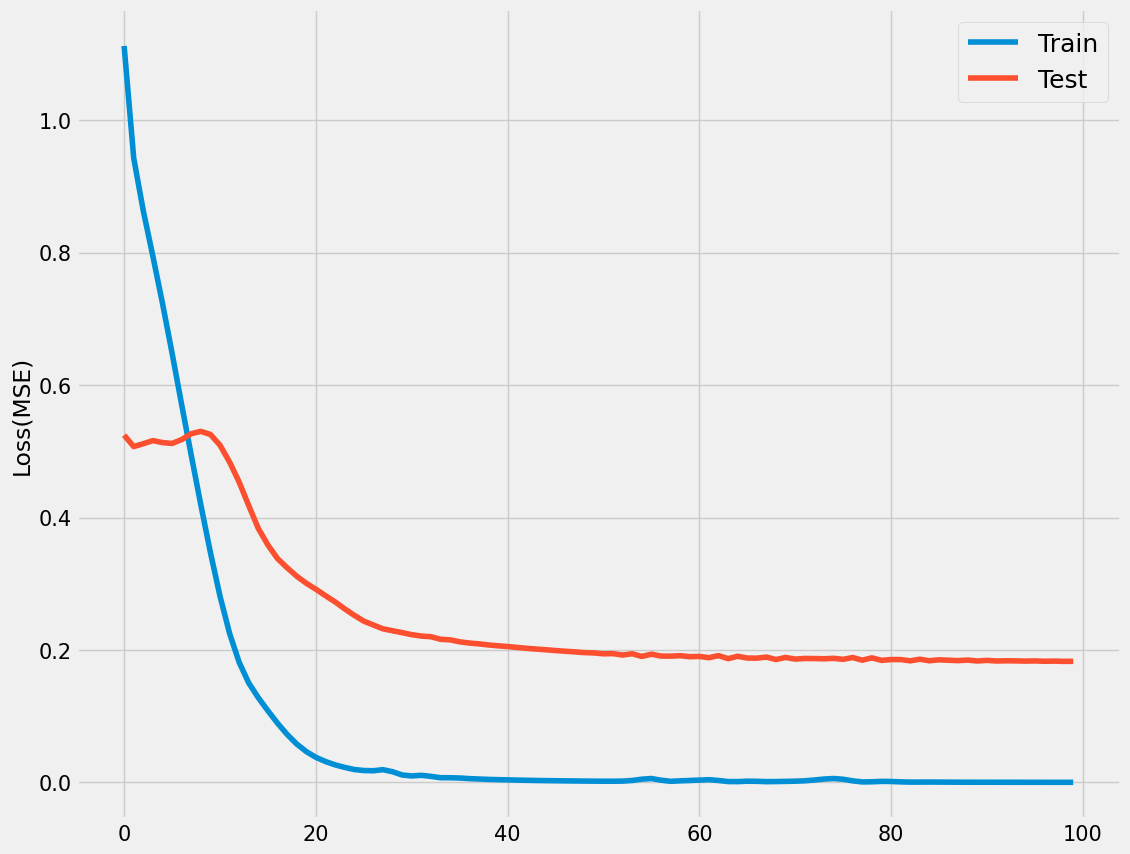

Metrics
MSE: 225.6859
RMSE: 15.0228
AIC:  318.31
 Real value shape : 58
 Prediction value shape : 58


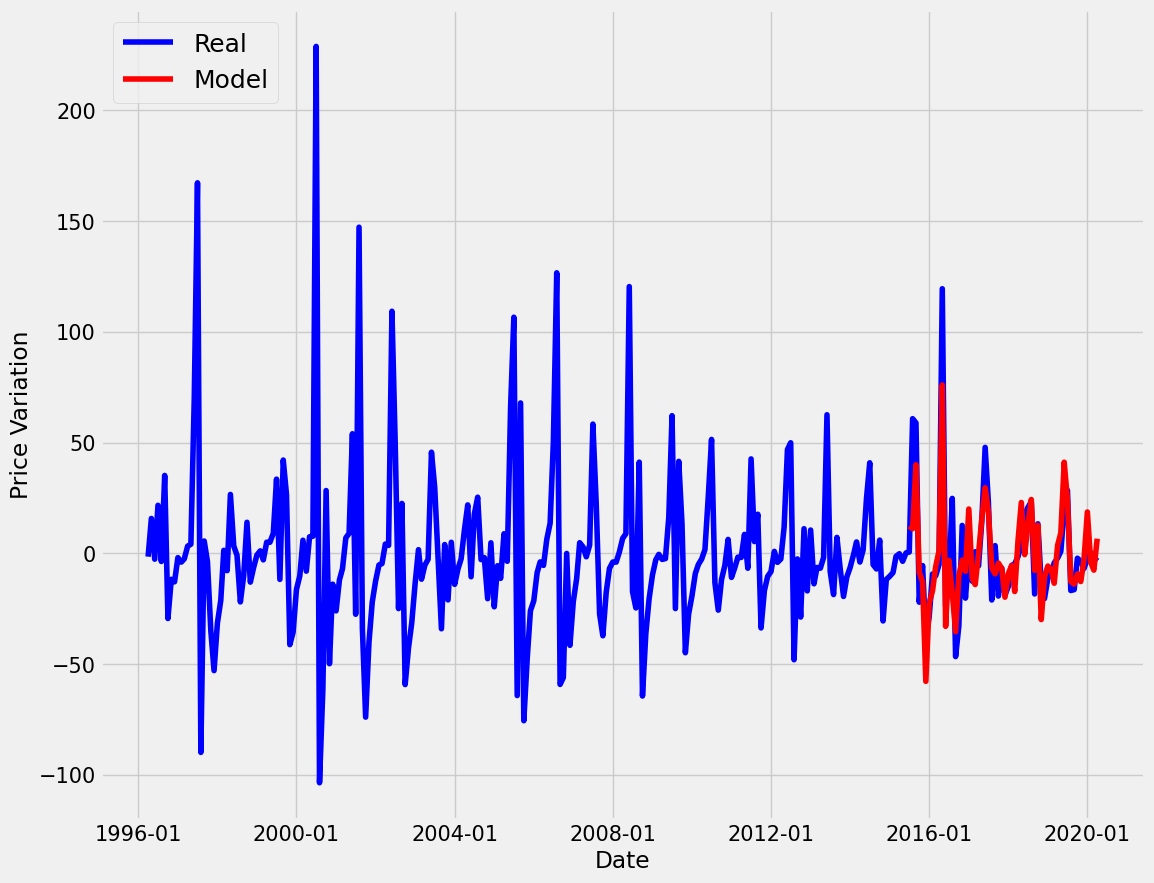

In [192]:
lstm_prices = model_lstm(df, lag=3, neuron1=200, neuron2=100, batch_size=100, epochs=100)

The resulting RSME of 13.31  in the validation test indicates how close the predictions are from the observed data. Since our model is built with the differentiations values, the RMSE result indicates that our model's predictions have a residual of 13.31 when predicting how much milk's price will change for the following month.

## Discussion and Future Work

**Applications of this Model**


The machine learning technique presented in this analysis can be used to predict climate changes, perform stock market predictions, and detect heart arrhythmias. 

Moreover, this type of model can help us fight climate change by giving us a tool to identify which variables are affecting weather variables, such as precipitation and maximum temperature. These models can also help companies and the government evaluate and control their carbon emissions. Finally, it can help us improve our energy efficiency by understanding our buildings' and electric cars' energy expenditure. 

**Future Work**

As future work, it would be important to optimize the LSTM model's hyperparameters and evaluate with a dimensionality reduction using techniques such as PCA and autoencoders.

Additional Features: 

- Unfortunately, we had very little information about the PIB variables; however, this could play an important role in the production of dairy products, so in future analysis, analyzing this feature with more information could improve our model.

- Cow inventories and Milk production per cow are other variables that could be very useful for predicting the milk's price. 

- Another important aspect to consider is seasonality; as we had little data to reduce to a quarterly problem, we did not perform the prediction using quarterly data but monthly. However, according to Mosheim(2012), using quarterly data allows capturing the sector's seasonality, which could provide a better prediction.

- Next, in this model we did not include a smoothening parameter; however, future analysis could experiment by including a smoothing paramter.

- Finally, we can also compare the results of our model with traditional time series methods such as Vector Autoregression (VAR). 



**Conclusions** 

During the analysis of this project, we  observed that the milk's price in Chile experiences high volatility. In our approach to predict this variable, we identified several covariates that presented seasonality, stationarity and trend and had to be treated before fitting a time-series model. We performed several preprocessing steps, such as winsorization the extreme values, duplicate removal,  missing value imputation, a differencing transformation. We also performed feature engineering by including additional variables to our dataset and transforming some of the variables to structure the data as a supervised learning problem. Finally, we build a model to predict the price of the latest data available 


References:

- Mosheim, R. (2012). A Quarterly Econometric Model for Short-Term Forecasting of the US Dairy Industry (No. 1488-2016-123440).

- https://www.ine.cl/estadisticas/economia/indices-de-precio-e-inflacion/indice-de-precios-al-consumidor